### Importing Libraries

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Dataset

In [42]:
data=pd.read_csv('PHQ-9_Dataset_5th Edition.csv')

In [43]:
data.head()

Age  Gender Little interest or pleasure in doing things   \
0   22    Male                      More than half the days   
1   25    Male                                   Not at all   
2   22  Female                                   Not at all   
3   18  Female                             Nearly every day   
4   24    Male                                   Not at all   

    Feeling down, depressed, or hopeless    \
0                               Not at all   
1                               Not at all   
2                               Not at all   
3                         Nearly every day   
4                               Not at all   

    Trouble falling or staying asleep, or sleeping too much    \
0                                         Not at all            
1                                   Nearly every day            
2                                         Not at all            
3                                         Not at all            
4                                         Not at all            

    Feeling tired or having little energy     Poor appetite or overeating    \
0                                Not at all                      Not at all   
1                          Nearly every day                Nearly every day   
2                                Not at all                      Not at all   
3                          Nearly every day         More than half the days   
4                                Not at all                      Not at all   

  Feeling bad about yourself—or that you are a failure or have let yourself or your family down    \
0                                         Not at all                                                
1                                         Not at all                                                
2                                         Not at all                                                
3                                         Not at all                                                
4                                         Not at all                                                

  Trouble concentrating on things, such as reading the newspaper or watching television    \
0                                         Not at all                                        
1                            More than half the days                                        
2                                       Several days                                        
3                                         Not at all                                        
4                                         Not at all                                        

  Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual    \
0                            More than half the days                                                                                                                         
1                            More than half the days                                                                                                                         
2                                         Not at all                                                                                                                         
3                                         Not at all                                                                                                                         
4                            More than half the days                                                                                                                         

  Thoughts that you would be better off dead or of hurting yourself in some way    \
0                                         Not at all                                
1                            More than half the days                                
2              

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                                                                                                                                                                    Non-Null Count  Dtype 
---  ------                                                                                                                                                                    --------------  ----- 
 0   Age                                                                                                                                                                       682 non-null    int64 
 1   Gender                                                                                                                                                                    682 non-null    object
 2   Little interest or pleasure in doing things                                                       

In [45]:
data.isnull().sum()

Age                                                                                                                                                                         0
Gender                                                                                                                                                                      0
Little interest or pleasure in doing things                                                                                                                                 0
  Feeling down, depressed, or hopeless                                                                                                                                      0
  Trouble falling or staying asleep, or sleeping too much                                                                                                                   0
  Feeling tired or having little energy                                                                                           

In [46]:
data.columns

Index(['Age', 'Gender', 'Little interest or pleasure in doing things ',
       '  Feeling down, depressed, or hopeless  ',
       '  Trouble falling or staying asleep, or sleeping too much  ',
       '  Feeling tired or having little energy  ',
       '  Poor appetite or overeating  ',
       'Feeling bad about yourself—or that you are a failure or have let yourself or your family down  ',
       'Trouble concentrating on things, such as reading the newspaper or watching television  ',
       'Moving or speaking so slowly that other people could have noticed? Or the opposite—being so fidgety or restless that you have been moving around a lot more than usual  ',
       'Thoughts that you would be better off dead or of hurting yourself in some way  ',
       'PHQ_Total', 'PHQ_Severity', 'Sleep Quality', 'Study Pressure',
       'Financial Pressure'],
      dtype='object')

In [47]:
# Rename columns to shorter, more manageable names
data.columns = ['Age', 'Gender', 'Interest_Pleasure', 'Feeling_Down', 
                'Sleep_Trouble', 'Tired_Low_Energy', 'Appetite_Issues',
                'Feeling_Bad_About_Self', 'Concentration_Trouble', 
                'Moving_Speaking_Issues', 'Thoughts_Self_Harm',
                'PHQ_Total', 'PHQ_Severity', 'Sleep_Quality', 
                'Study_Pressure', 'Financial_Pressure']


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     682 non-null    int64 
 1   Gender                  682 non-null    object
 2   Interest_Pleasure       682 non-null    object
 3   Feeling_Down            682 non-null    object
 4   Sleep_Trouble           682 non-null    object
 5   Tired_Low_Energy        682 non-null    object
 6   Appetite_Issues         682 non-null    object
 7   Feeling_Bad_About_Self  682 non-null    object
 8   Concentration_Trouble   682 non-null    object
 9   Moving_Speaking_Issues  682 non-null    object
 10  Thoughts_Self_Harm      682 non-null    object
 11  PHQ_Total               682 non-null    int64 
 12  PHQ_Severity            682 non-null    object
 13  Sleep_Quality           682 non-null    object
 14  Study_Pressure          682 non-null    object
 15  Financ

### EDA

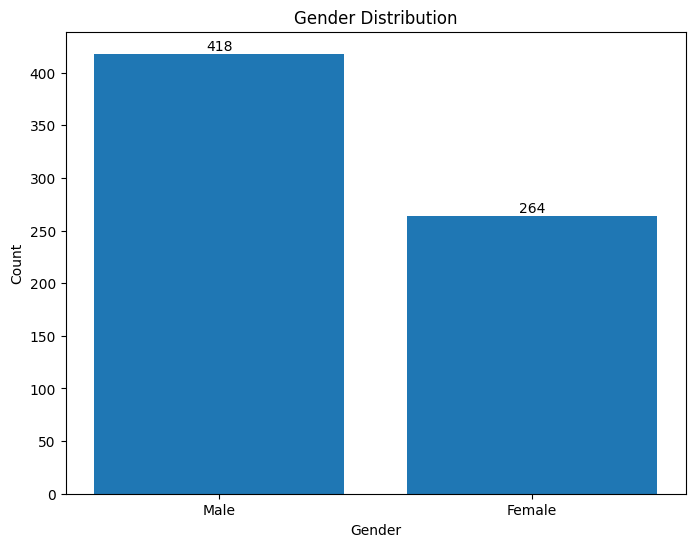

In [49]:
# Show gender distribution
import matplotlib.pyplot as plt

gender_counts = data['Gender'].value_counts()
plt.figure(figsize=(8, 6))
bars = plt.bar(gender_counts.index, gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')

# Add numbers at the top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height)}',
             ha='center', va='bottom')

plt.show()

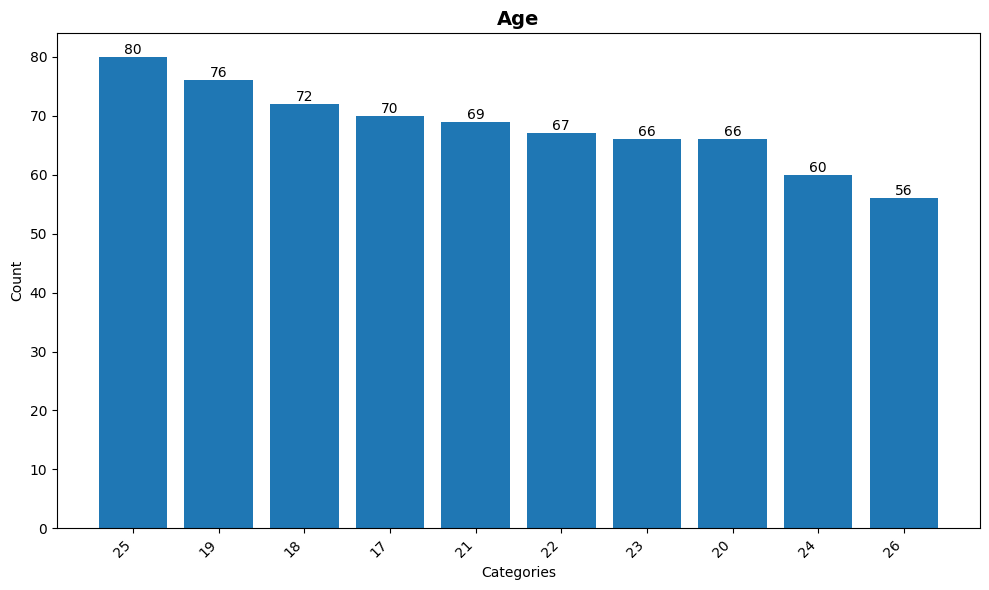

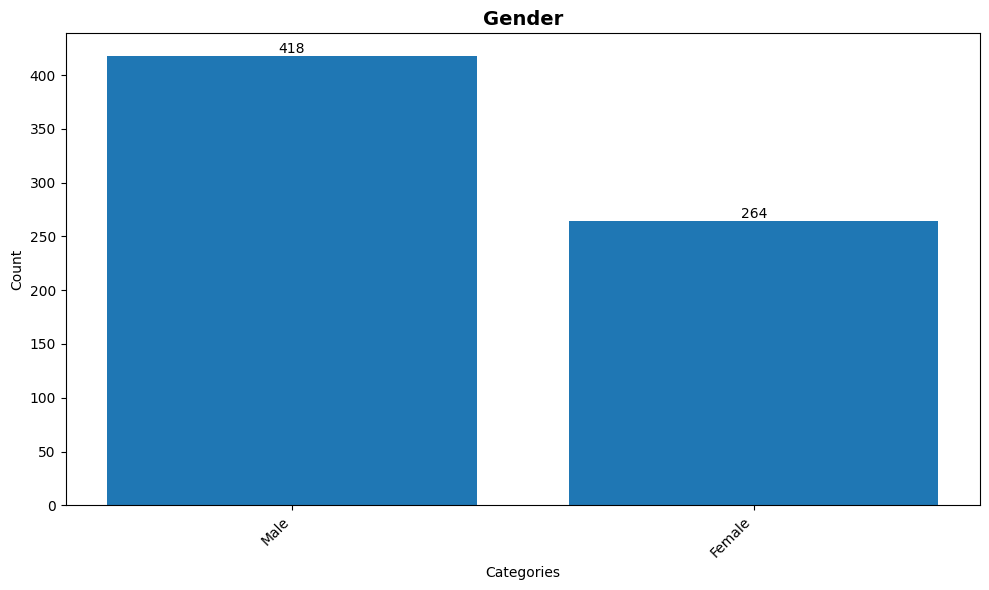

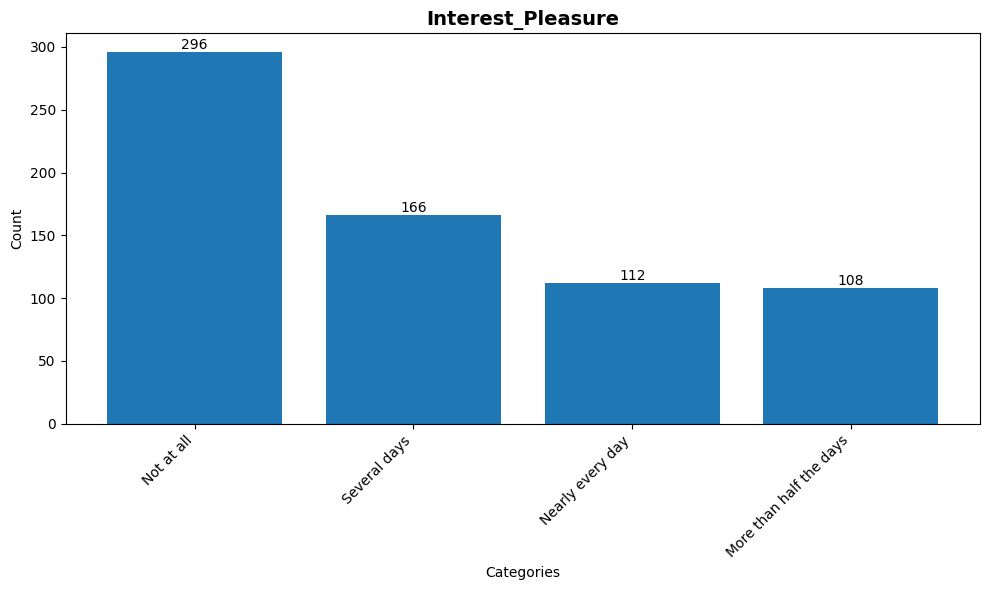

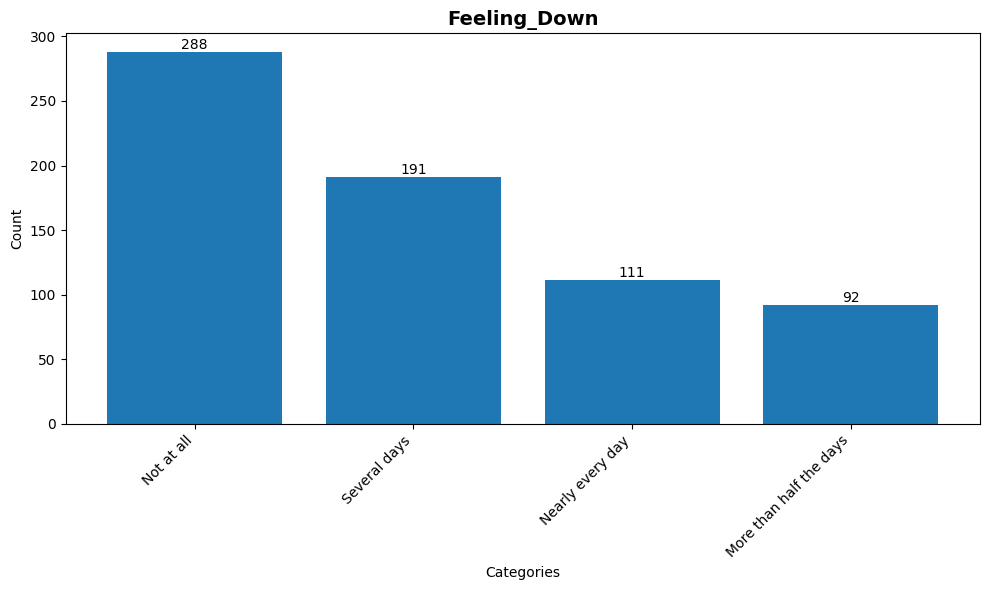

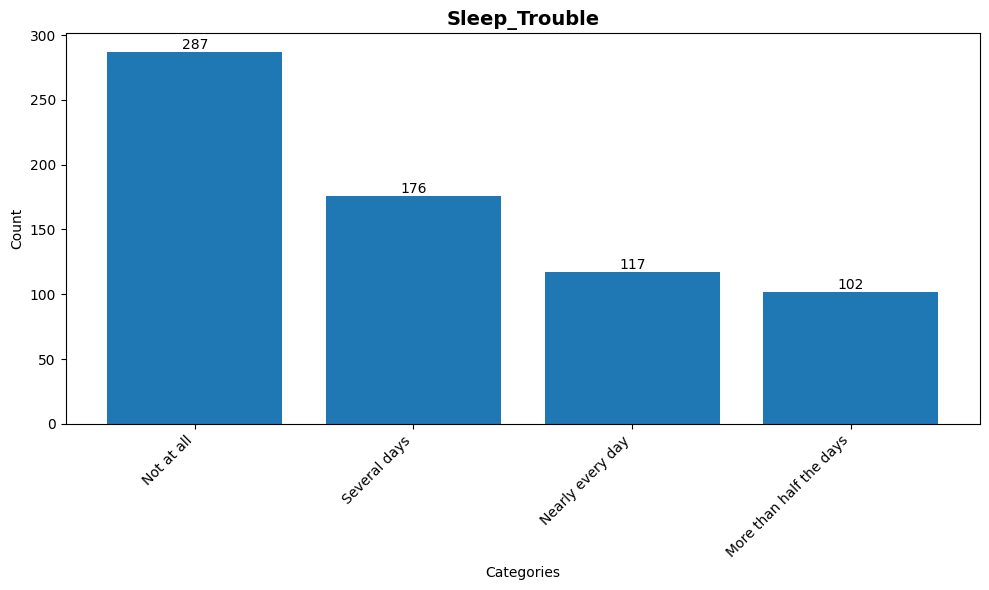

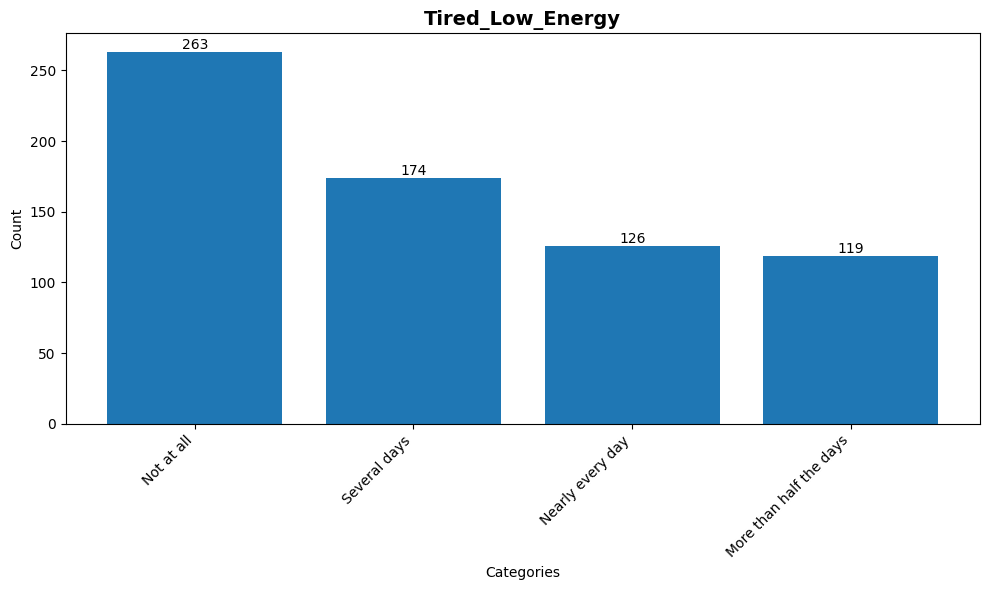

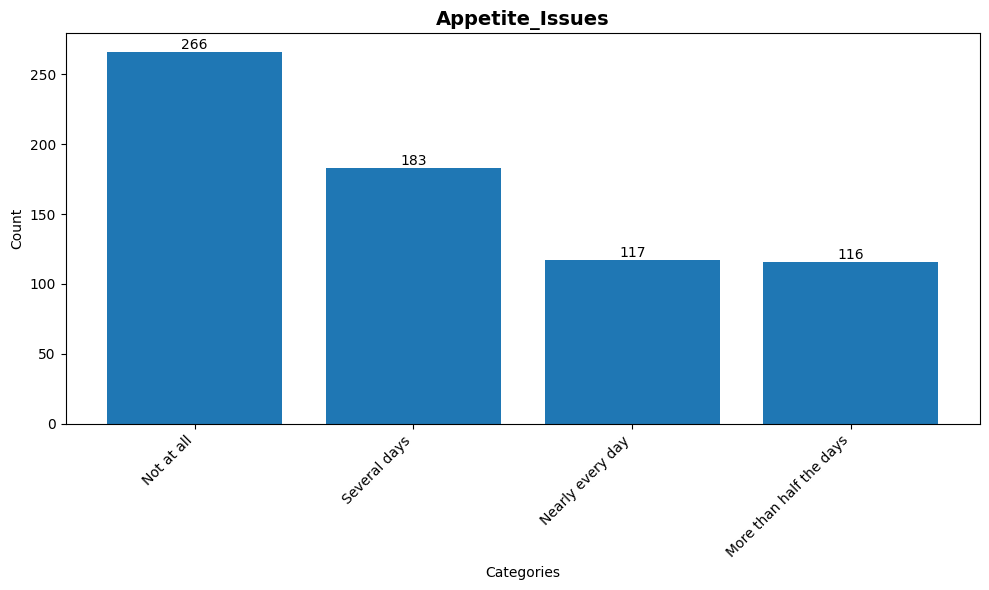

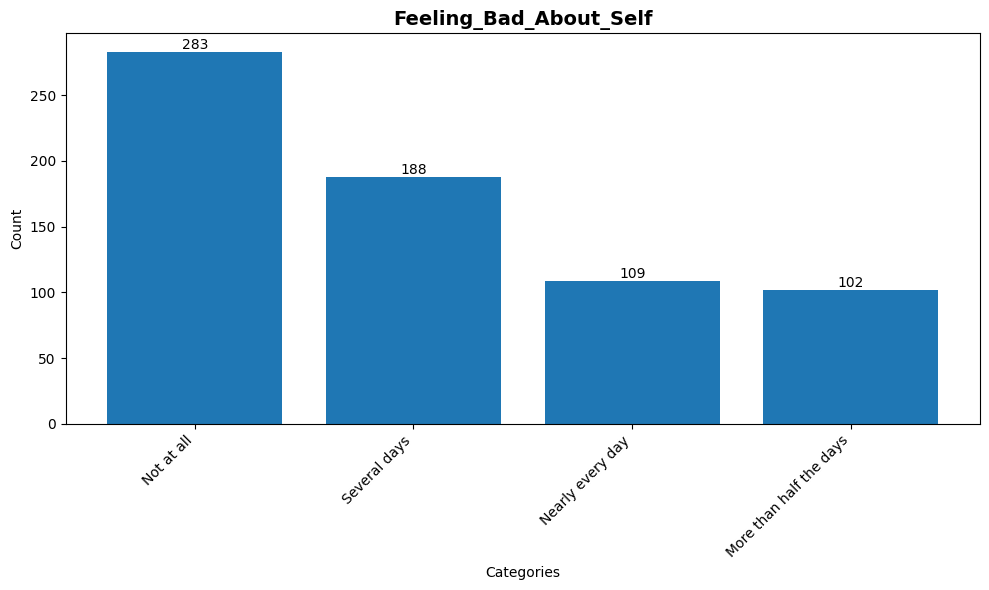

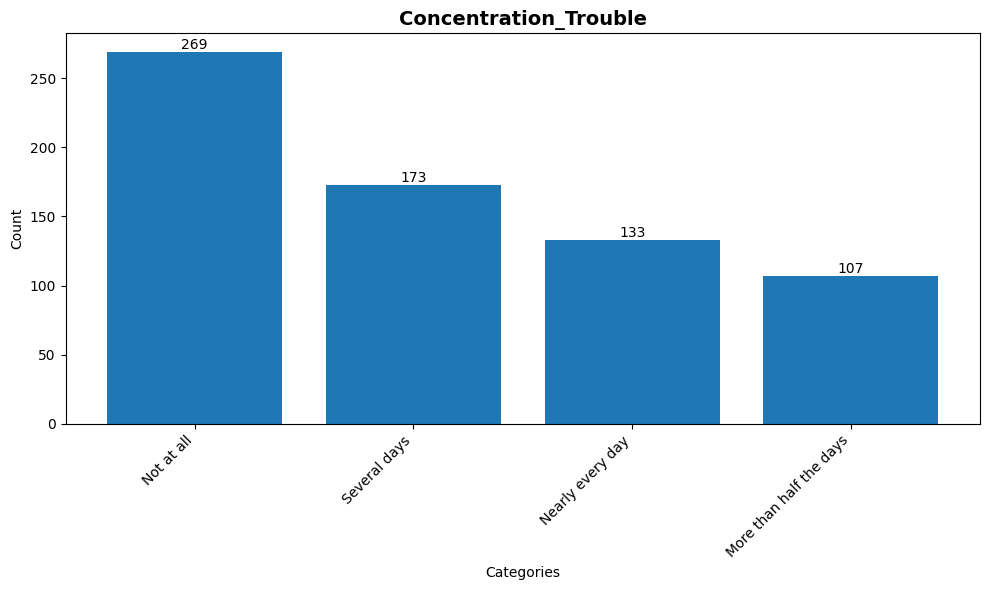

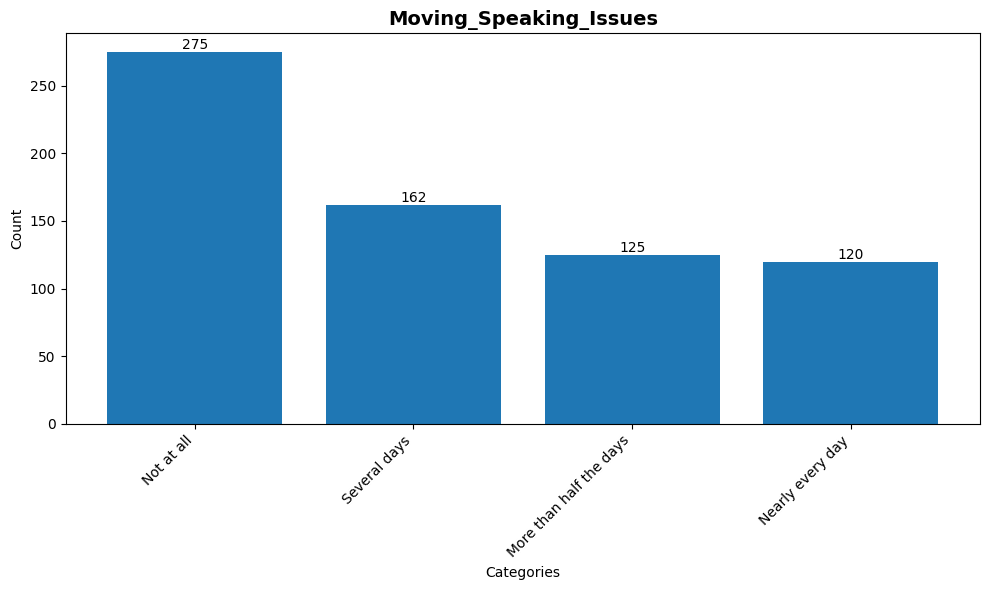

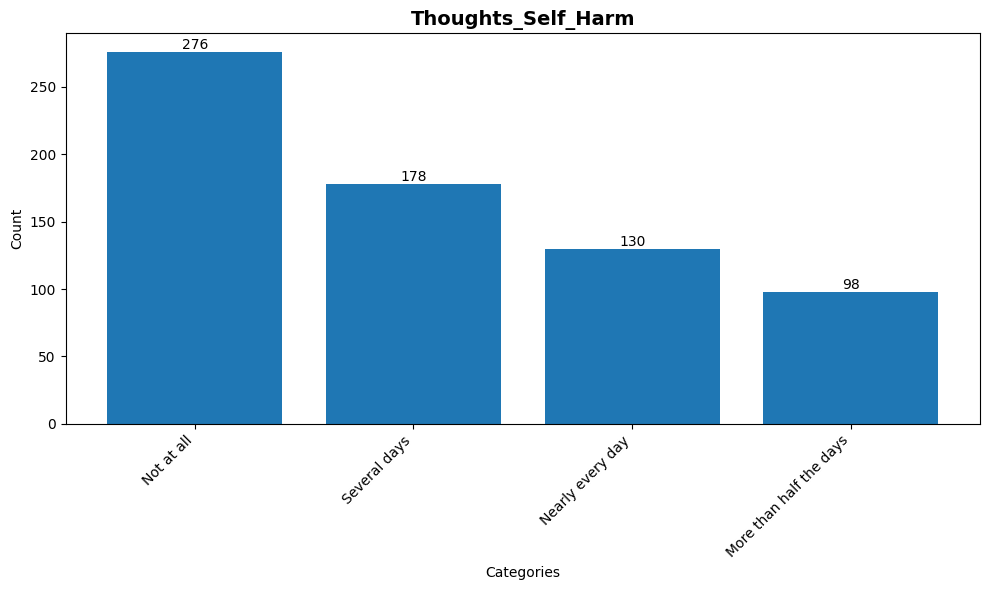

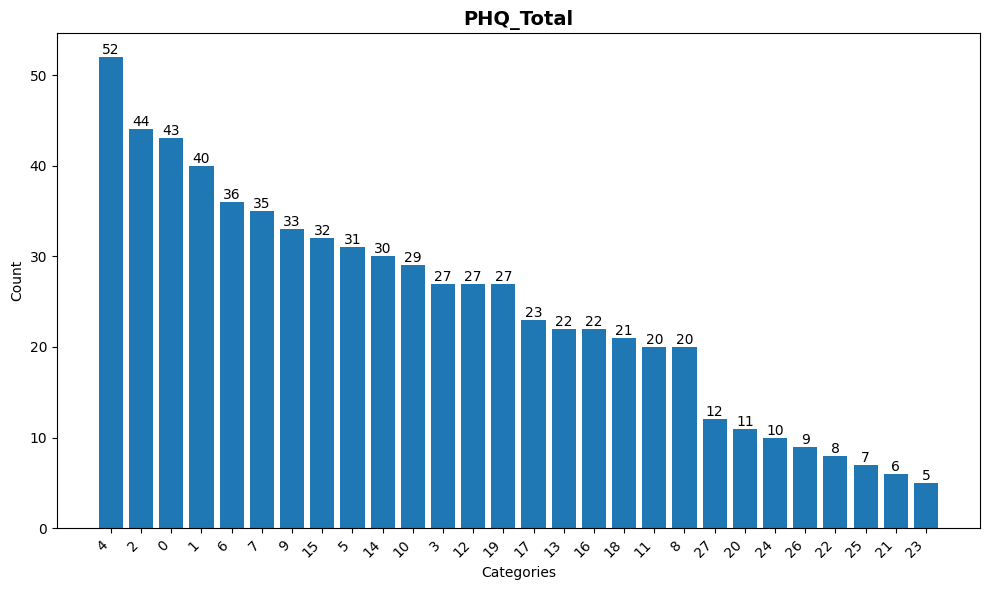

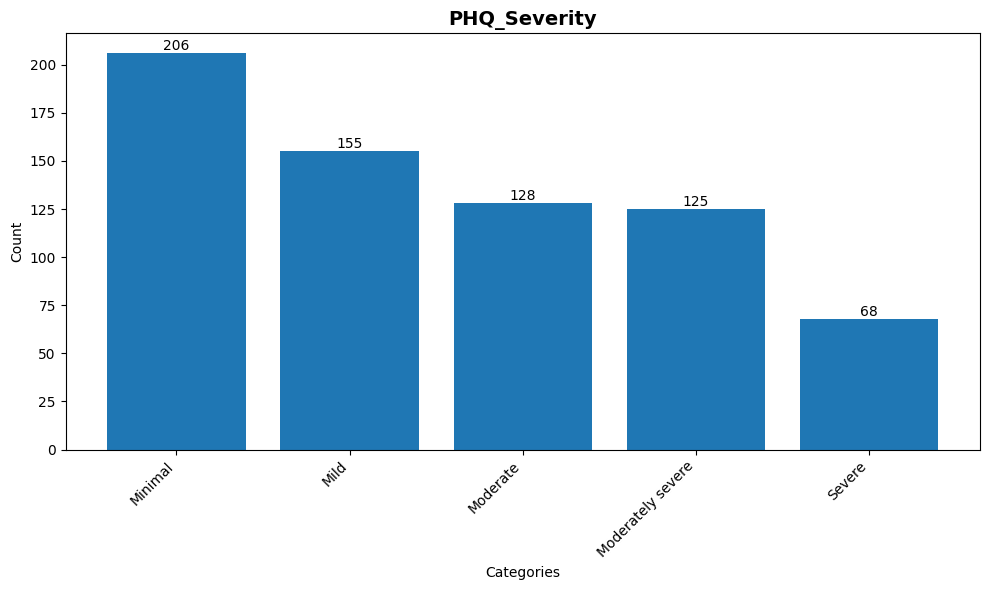

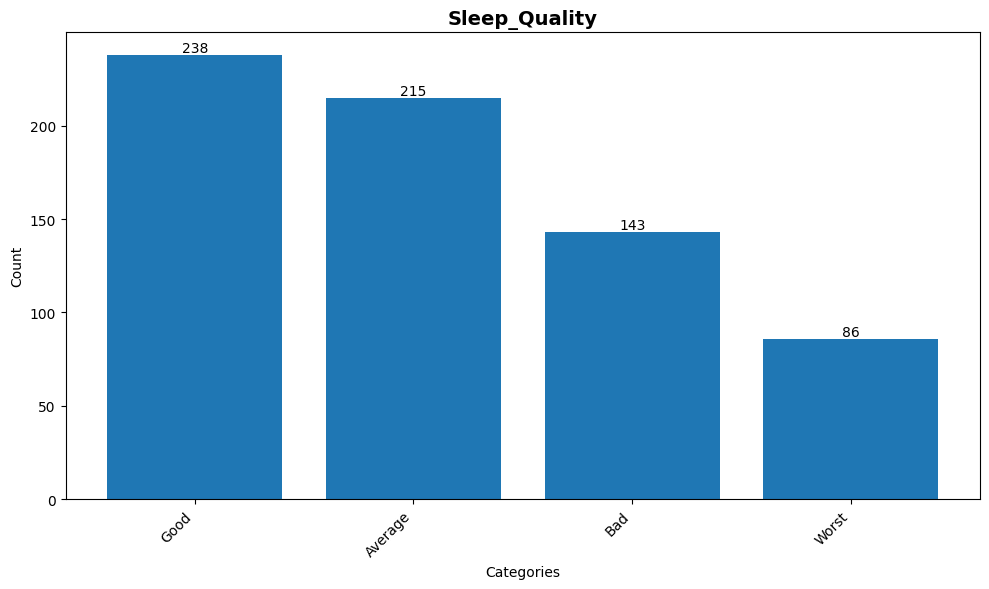

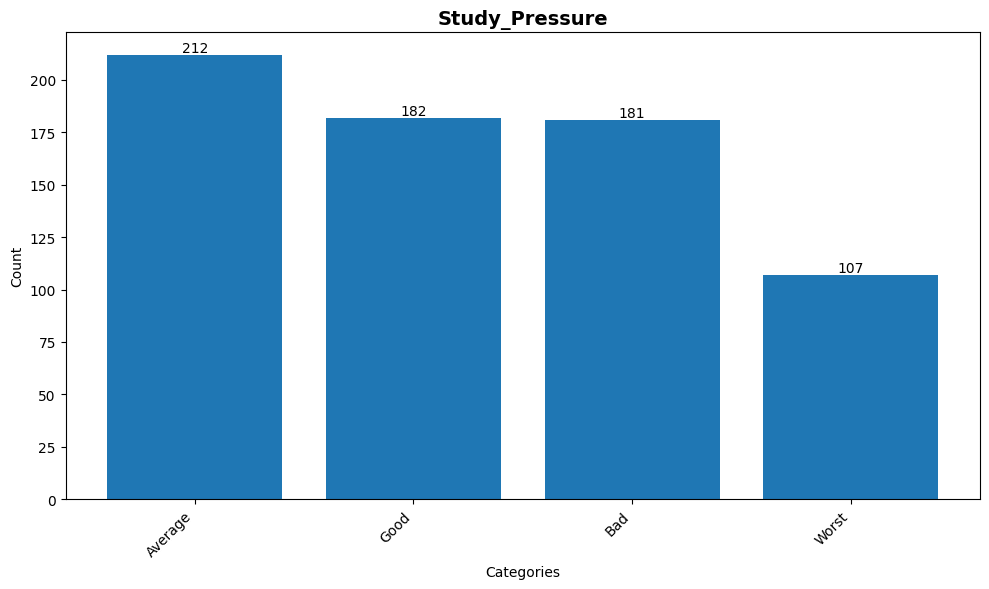

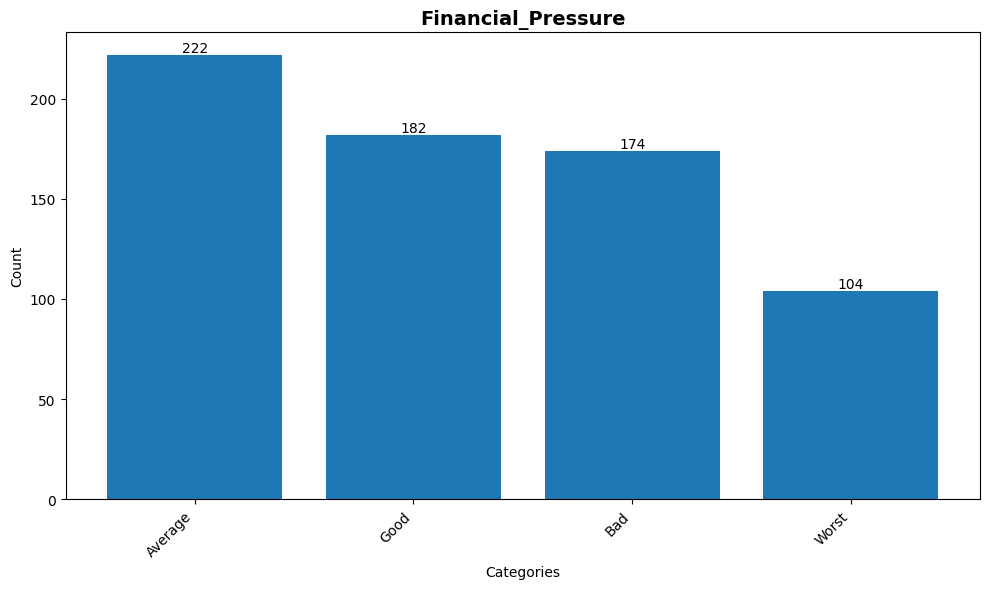

In [50]:
# Create count plots for all columns in the dataset - each in separate diagrams
import matplotlib.pyplot as plt
import seaborn as sns

# Get all column names
columns = data.columns.tolist()

# Create separate plot for each column
for column in columns:
    plt.figure(figsize=(10, 6))
    
    # Get value counts
    value_counts = data[column].value_counts()
    
    # Create bar plot
    bars = plt.bar(range(len(value_counts)), value_counts.values)
    plt.title(f'{column}', fontsize=14, fontweight='bold')
    plt.xlabel('Categories')
    plt.ylabel('Count')
    
    # Set x-axis labels
    plt.xticks(range(len(value_counts)), value_counts.index, rotation=45, ha='right')
    
    # Add count labels on top of bars
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}',
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


In [51]:
data.isnull().sum()

Age                       0
Gender                    0
Interest_Pleasure         0
Feeling_Down              0
Sleep_Trouble             0
Tired_Low_Energy          0
Appetite_Issues           0
Feeling_Bad_About_Self    0
Concentration_Trouble     0
Moving_Speaking_Issues    0
Thoughts_Self_Harm        0
PHQ_Total                 0
PHQ_Severity              0
Sleep_Quality             0
Study_Pressure            0
Financial_Pressure        0
dtype: int64

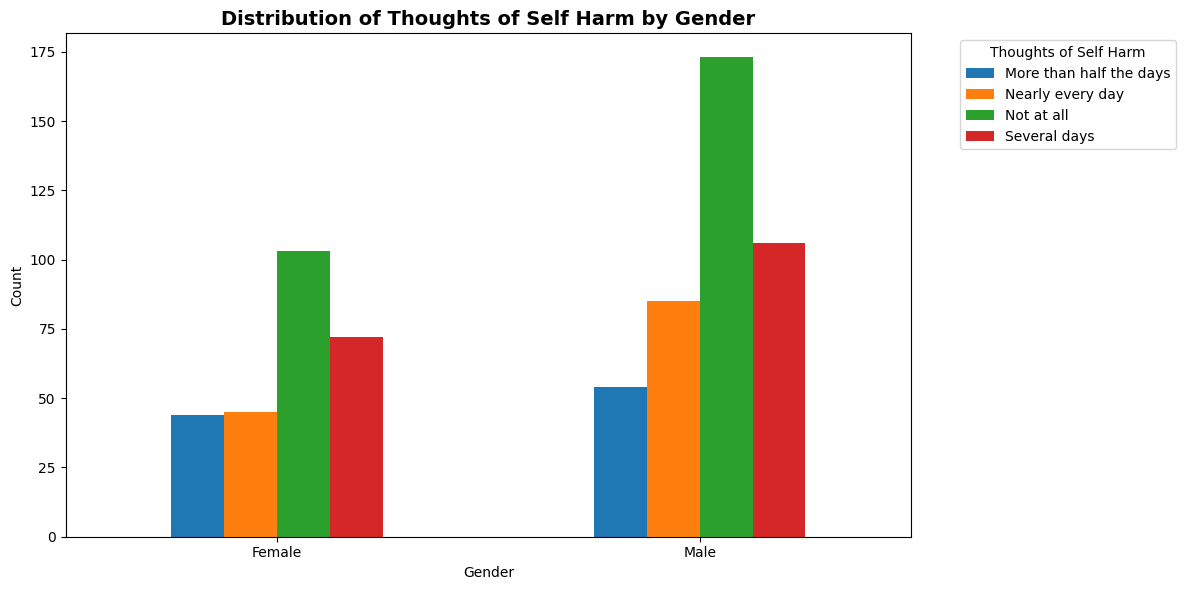

In [52]:
# Distribution of thoughts of self harm between men and women
import matplotlib.pyplot as plt
import seaborn as sns

# Create a cross-tabulation using the renamed column
cross_tab = pd.crosstab(data['Gender'], data['Thoughts_Self_Harm'])

# Create a grouped bar plot
plt.figure(figsize=(12, 6))
cross_tab.plot(kind='bar', ax=plt.gca())
plt.title('Distribution of Thoughts of Self Harm by Gender', fontsize=14, fontweight='bold')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Thoughts of Self Harm', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


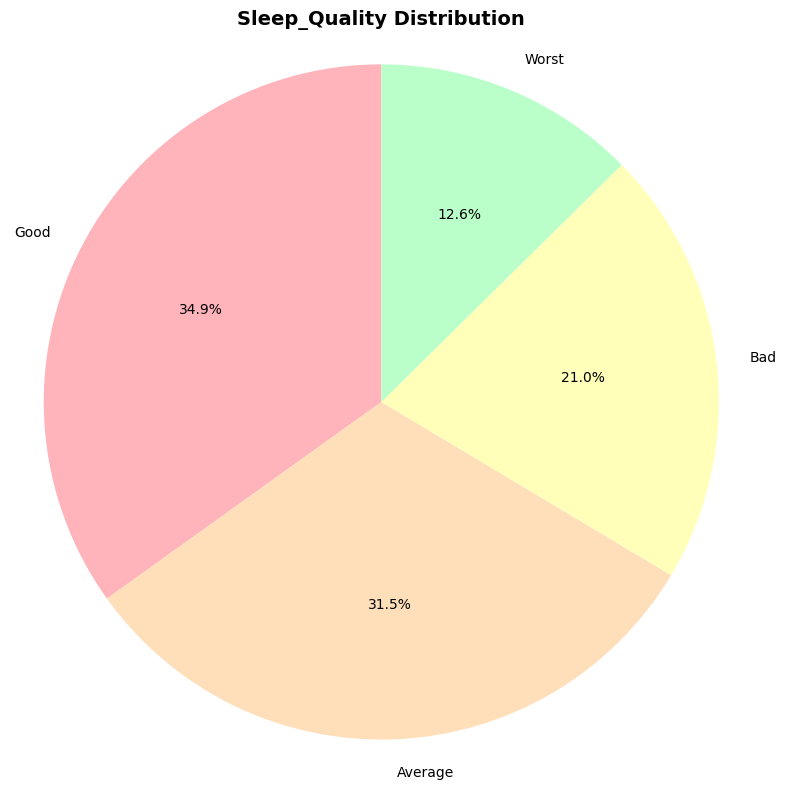

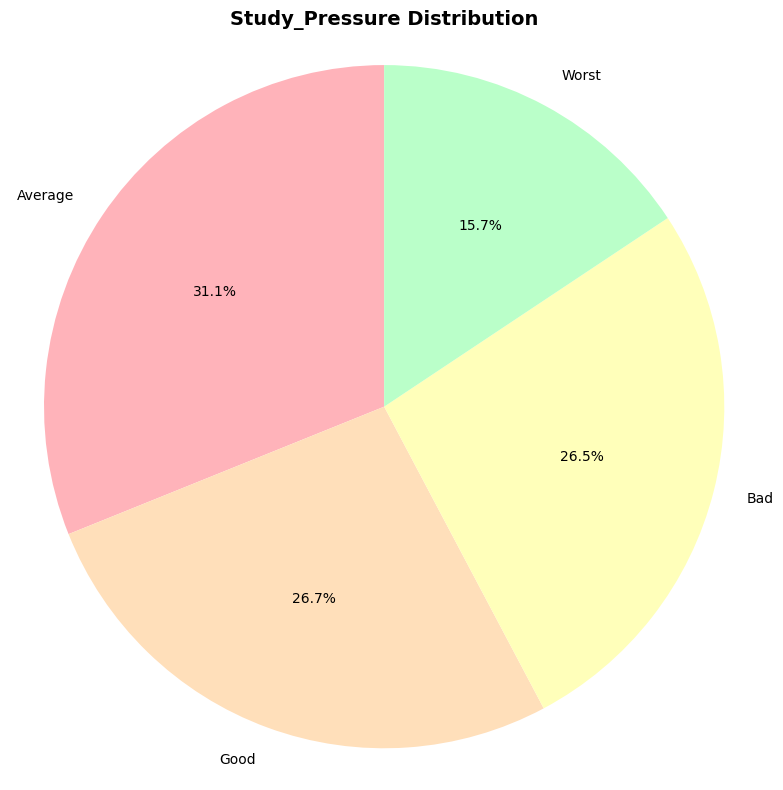

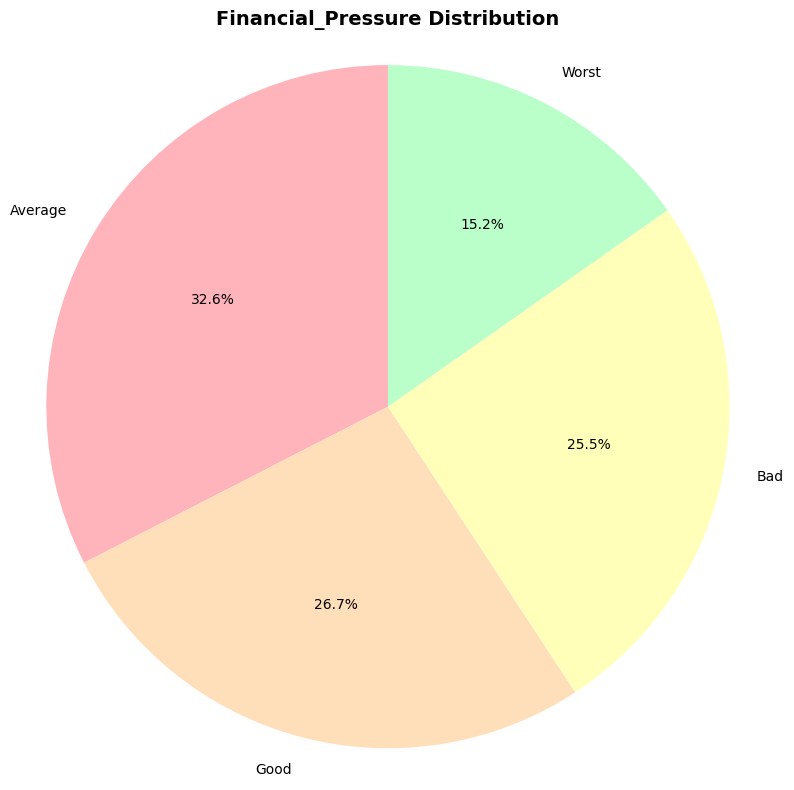

In [53]:
# Create pie charts for Sleep_Quality, Study_Pressure, and Financial_Pressure
import matplotlib.pyplot as plt

# List of columns to create pie charts for (excluding PHQ_Severity since it was dropped)
pie_columns = ['Sleep_Quality', 'Study_Pressure', 'Financial_Pressure']

# Define pastel colors
pastel_colors = ['#FFB3BA', '#FFDFBA', '#FFFFBA', '#BAFFC9', '#BAE1FF', '#E1BAFF', '#FFBAE1', '#C9BAFF']

# Create separate pie chart for each column
for column in pie_columns:
    if column in data.columns:  # Check if column exists in the dataframe
        plt.figure(figsize=(8, 8))
        
        # Get value counts
        value_counts = data[column].value_counts()
        
        # Create pie chart with pastel colors
        plt.pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=pastel_colors[:len(value_counts)])
        plt.title(f'{column} Distribution', fontsize=14, fontweight='bold')
        
        # Equal aspect ratio ensures that pie is drawn as a circle
        plt.axis('equal')
        
        plt.tight_layout()
        plt.show()
    else:
        print(f"Column '{column}' not found in the dataset")

### Data Preprocessing

In [54]:
# Perform encoding for categorical variables
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
le = LabelEncoder()

# List of categorical columns that need encoding
categorical_columns = ['Gender', 'Interest_Pleasure', 'Feeling_Down', 'Sleep_Trouble', 
                      'Tired_Low_Energy', 'Appetite_Issues', 'Feeling_Bad_About_Self',
                      'Concentration_Trouble', 'Moving_Speaking_Issues', 'Thoughts_Self_Harm',
                      'PHQ_Severity', 'Sleep_Quality', 'Study_Pressure', 'Financial_Pressure']

# Apply label encoding to each categorical column
for column in categorical_columns:
    if column in data.columns:
        data[column] = le.fit_transform(data[column])

# Display the first few rows to verify encoding
print("Data after encoding:")
print(data.head())

# Check data types after encoding
print("\nData types after encoding:")
print(data.dtypes)


Data after encoding:
   Age  Gender  Interest_Pleasure  Feeling_Down  Sleep_Trouble  \
0   22       1                  0             2              2   
1   25       1                  2             2              1   
2   22       0                  2             2              2   
3   18       0                  1             1              2   
4   24       1                  2             2              2   

   Tired_Low_Energy  Appetite_Issues  Feeling_Bad_About_Self  \
0                 2                2                       2   
1                 1                1                       2   
2                 2                2                       2   
3                 1                0                       2   
4                 2                2                       2   

   Concentration_Trouble  Moving_Speaking_Issues  Thoughts_Self_Harm  \
0                      2                       0                   2   
1                      0                       0     

In [55]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     682 non-null    int64
 1   Gender                  682 non-null    int64
 2   Interest_Pleasure       682 non-null    int64
 3   Feeling_Down            682 non-null    int64
 4   Sleep_Trouble           682 non-null    int64
 5   Tired_Low_Energy        682 non-null    int64
 6   Appetite_Issues         682 non-null    int64
 7   Feeling_Bad_About_Self  682 non-null    int64
 8   Concentration_Trouble   682 non-null    int64
 9   Moving_Speaking_Issues  682 non-null    int64
 10  Thoughts_Self_Harm      682 non-null    int64
 11  PHQ_Total               682 non-null    int64
 12  PHQ_Severity            682 non-null    int64
 13  Sleep_Quality           682 non-null    int64
 14  Study_Pressure          682 non-null    int64
 15  Financial_Pressure     

### Feature Engineering

In [56]:
# OPTIMAL FEATURE ENGINEERING FOR YOUR DATASET
def optimal_depression_feature_engineering(data):
    # 1. DON'T drop PHQ_Total and PHQ_Severity - use them as targets!
    
    # 2. Create clinically accurate binary target
    data['Depression_Binary'] = (data['PHQ_Total'] >= 10).astype(int)  # Clinical threshold
    
    # 3. Create symptom category features for better ML performance
    data['Core_Symptoms'] = data[['Interest_Pleasure', 'Feeling_Down']].sum(axis=1)
    data['Physical_Symptoms'] = data[['Sleep_Trouble', 'Tired_Low_Energy', 'Appetite_Issues']].sum(axis=1)
    data['Cognitive_Symptoms'] = data[['Concentration_Trouble', 'Feeling_Bad_About_Self']].sum(axis=1)
    data['Risk_Symptoms'] = data[['Thoughts_Self_Harm', 'Moving_Speaking_Issues']].sum(axis=1)
    
    # 4. Create additional contextual features
    data['Total_Symptom_Score'] = data['Core_Symptoms'] + data['Physical_Symptoms'] + data['Cognitive_Symptoms'] + data['Risk_Symptoms']
    
    # 5. Risk stratification
    data['High_Risk'] = (data['PHQ_Total'] >= 15).astype(int)
    data['Suicidal_Risk'] = (data['Thoughts_Self_Harm'] >= 2).astype(int)
    
    return data

# Usage:
# Use 'Depression_Binary' as your main target (replaces your current 'Depression Status')
# Keep 'PHQ_Total' and 'PHQ_Severity' for validation and multi-task learning

In [58]:
data=optimal_depression_feature_engineering(data)

In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 682 entries, 0 to 681
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Age                     682 non-null    int64
 1   Gender                  682 non-null    int64
 2   Interest_Pleasure       682 non-null    int64
 3   Feeling_Down            682 non-null    int64
 4   Sleep_Trouble           682 non-null    int64
 5   Tired_Low_Energy        682 non-null    int64
 6   Appetite_Issues         682 non-null    int64
 7   Feeling_Bad_About_Self  682 non-null    int64
 8   Concentration_Trouble   682 non-null    int64
 9   Moving_Speaking_Issues  682 non-null    int64
 10  Thoughts_Self_Harm      682 non-null    int64
 11  PHQ_Total               682 non-null    int64
 12  PHQ_Severity            682 non-null    int64
 13  Sleep_Quality           682 non-null    int64
 14  Study_Pressure          682 non-null    int64
 15  Financial_Pressure     

### Correlation Matrix

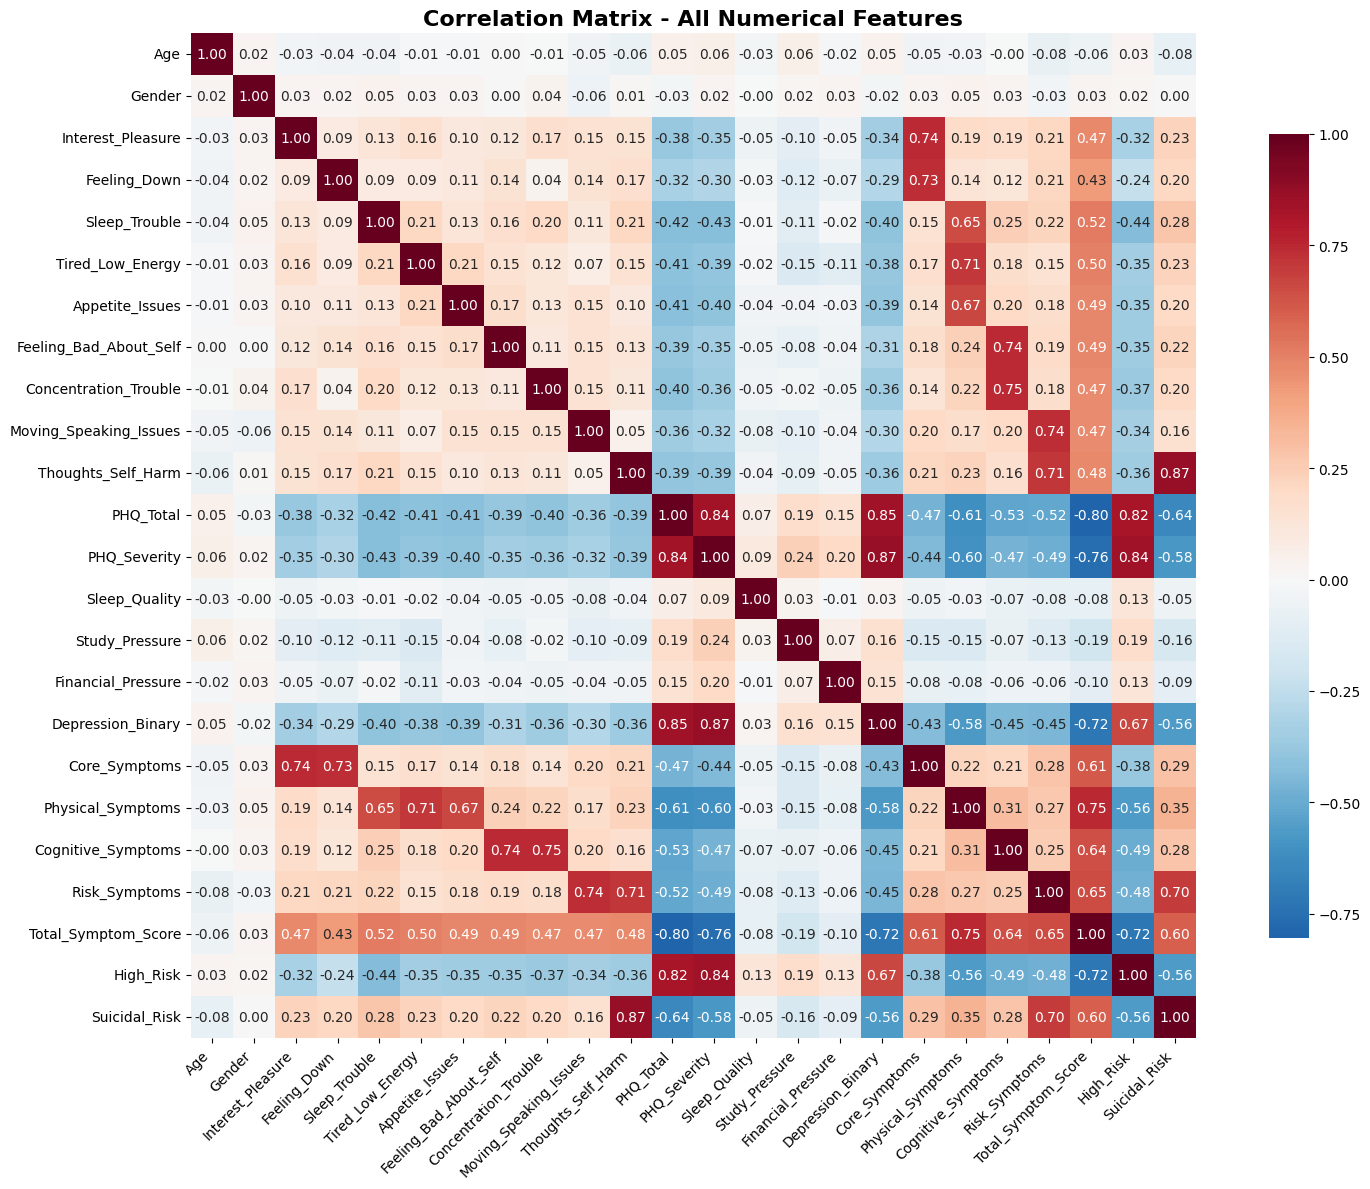

In [62]:
# Create correlation matrix for all numerical features
plt.figure(figsize=(16, 12))

# Select numerical columns for correlation
numerical_cols = data.select_dtypes(include=[np.number]).columns
correlation_matrix = data[numerical_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdBu_r', 
            center=0,
            square=True,
            fmt='.2f',
            cbar_kws={'shrink': 0.8})

plt.title('Correlation Matrix - All Numerical Features', fontsize=16, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


### Enhanced Model Implementation
Based on comprehensive analysis, implementing multiple prediction tasks with optimized models for each target.


In [63]:
# Enhanced imports for advanced models and explainable AI
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, r2_score, roc_auc_score, roc_curve
import xgboost as xgb
import warnings
warnings.filterwarnings('ignore')

# For explainable AI
try:
    import shap
    SHAP_AVAILABLE = True
    print("SHAP available for explainable AI")
except ImportError:
    SHAP_AVAILABLE = False
    print("SHAP not available. Install with: pip install shap")

try:
    from lime import lime_tabular
    LIME_AVAILABLE = True
    print("LIME available for local explanations")
except ImportError:
    LIME_AVAILABLE = False
    print("LIME not available. Install with: pip install lime")

print("All enhanced libraries loaded successfully!")


SHAP available for explainable AI
LIME available for local explanations
All enhanced libraries loaded successfully!


### 1. DEPRESSION_BINARY CLASSIFICATION
**Primary Target: Clinical Depression (≥10 PHQ score)**
**Best Models: Random Forest, XGBoost, Logistic Regression**


In [64]:
# Prepare data for Depression_Binary classification
# Use all features except target variables for prediction
feature_columns = [col for col in data.columns if col not in ['Depression_Binary', 'PHQ_Total', 'PHQ_Severity', 'High_Risk', 'Suicidal_Risk']]
X = data[feature_columns]
y_depression = data['Depression_Binary']

print(f"Features for Depression_Binary prediction: {len(feature_columns)}")
print(f"Feature columns: {feature_columns}")
print(f"Target distribution: {y_depression.value_counts()}")
print(f"Target distribution (%): {y_depression.value_counts(normalize=True) * 100}")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_depression, test_size=0.2, random_state=42, stratify=y_depression)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTraining set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Training target distribution: {y_train.value_counts()}")
print(f"Test target distribution: {y_test.value_counts()}")


Features for Depression_Binary prediction: 19
Feature columns: ['Age', 'Gender', 'Interest_Pleasure', 'Feeling_Down', 'Sleep_Trouble', 'Tired_Low_Energy', 'Appetite_Issues', 'Feeling_Bad_About_Self', 'Concentration_Trouble', 'Moving_Speaking_Issues', 'Thoughts_Self_Harm', 'Sleep_Quality', 'Study_Pressure', 'Financial_Pressure', 'Core_Symptoms', 'Physical_Symptoms', 'Cognitive_Symptoms', 'Risk_Symptoms', 'Total_Symptom_Score']
Target distribution: Depression_Binary
0    361
1    321
Name: count, dtype: int64
Target distribution (%): Depression_Binary
0    52.932551
1    47.067449
Name: proportion, dtype: float64

Training set: 545 samples
Test set: 137 samples
Training target distribution: Depression_Binary
0    288
1    257
Name: count, dtype: int64
Test target distribution: Depression_Binary
0    73
1    64
Name: count, dtype: int64


1. RANDOM FOREST CLASSIFIER
Accuracy: 0.8905
AUC-ROC: 0.9743

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        73
           1       0.89      0.88      0.88        64

    accuracy                           0.89       137
   macro avg       0.89      0.89      0.89       137
weighted avg       0.89      0.89      0.89       137


Top 10 Most Important Features:
                  Feature  Importance
18    Total_Symptom_Score    0.222710
5        Tired_Low_Energy    0.107375
6         Appetite_Issues    0.102867
4           Sleep_Trouble    0.096177
15      Physical_Symptoms    0.095649
2       Interest_Pleasure    0.068087
10     Thoughts_Self_Harm    0.060413
8   Concentration_Trouble    0.056413
16     Cognitive_Symptoms    0.044790
3            Feeling_Down    0.035944


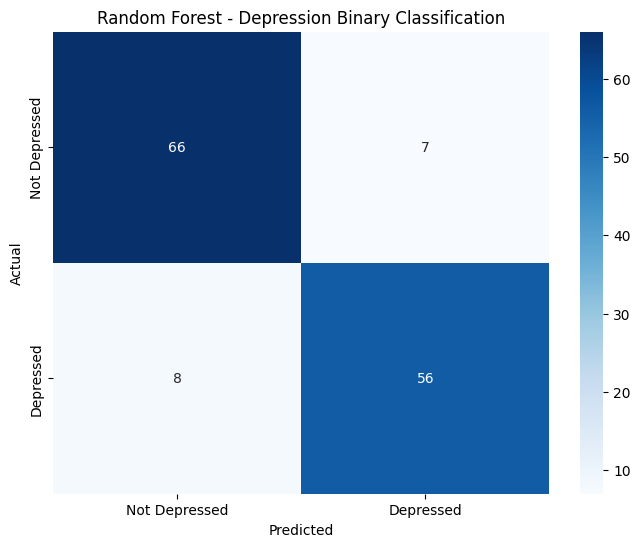

In [65]:
# 1. RANDOM FOREST CLASSIFIER - Best for Depression_Binary
print("="*60)
print("1. RANDOM FOREST CLASSIFIER")
print("="*60)

rf_depression = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)

# Train and evaluate
rf_depression.fit(X_train_scaled, y_train)
y_pred_rf = rf_depression.predict(X_test_scaled)
y_proba_rf = rf_depression.predict_proba(X_test_scaled)[:, 1]

# Performance metrics
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

print(f"Accuracy: {accuracy_rf:.4f}")
print(f"AUC-ROC: {auc_rf:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

# Feature importance
feature_importance_rf = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': rf_depression.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf.head(10))

# Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title('Random Forest - Depression Binary Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


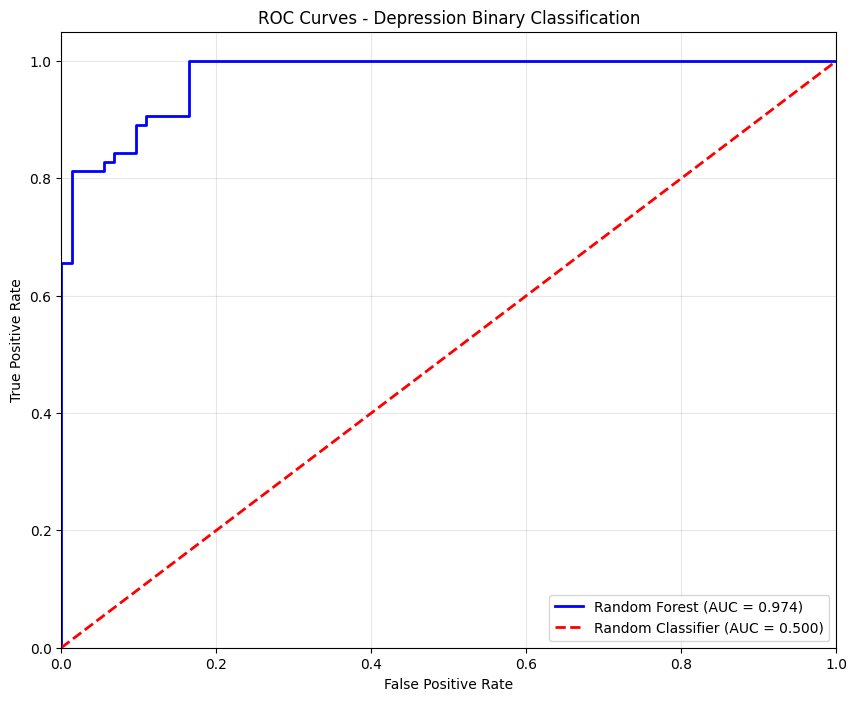

In [66]:
# ROC Curve Comparison
plt.figure(figsize=(10, 8))

# Random Forest ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
plt.plot(fpr_rf, tpr_rf, color='blue', lw=2, 
         label=f'Random Forest (AUC = {auc_rf:.3f})')

# XGBoost ROC Curve (if available)
if 'y_proba_xgb' in locals():
    fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)
    plt.plot(fpr_xgb, tpr_xgb, color='green', lw=2, 
             label=f'XGBoost (AUC = {auc_xgb:.3f})')

# Diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', 
         label='Random Classifier (AUC = 0.500)')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Depression Binary Classification')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


2. XGBOOST CLASSIFIER
Accuracy: 0.9635
AUC-ROC: 0.9944

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97        73
           1       0.97      0.95      0.96        64

    accuracy                           0.96       137
   macro avg       0.96      0.96      0.96       137
weighted avg       0.96      0.96      0.96       137


Top 10 Most Important Features:
                   Feature  Importance
18     Total_Symptom_Score    0.323058
15       Physical_Symptoms    0.098299
6          Appetite_Issues    0.070049
10      Thoughts_Self_Harm    0.060187
4            Sleep_Trouble    0.057909
5         Tired_Low_Energy    0.052691
2        Interest_Pleasure    0.044491
8    Concentration_Trouble    0.035308
7   Feeling_Bad_About_Self    0.035215
17           Risk_Symptoms    0.033008


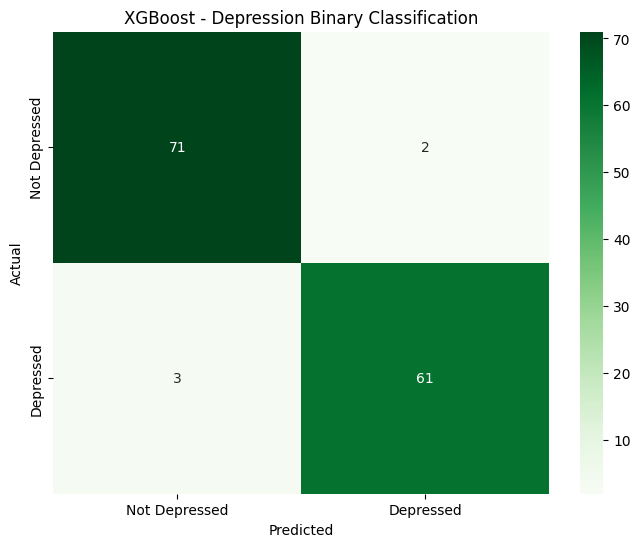

In [67]:
# 2. XGBOOST CLASSIFIER - State-of-the-art for Depression_Binary
print("="*60)
print("2. XGBOOST CLASSIFIER")
print("="*60)

xgb_depression = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'
)

# Train and evaluate
xgb_depression.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_depression.predict(X_test_scaled)
y_proba_xgb = xgb_depression.predict_proba(X_test_scaled)[:, 1]

# Performance metrics
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
auc_xgb = roc_auc_score(y_test, y_proba_xgb)

print(f"Accuracy: {accuracy_xgb:.4f}")
print(f"AUC-ROC: {auc_xgb:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

# Feature importance
feature_importance_xgb = pd.DataFrame({
    'Feature': feature_columns,
    'Importance': xgb_depression.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_xgb.head(10))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Greens', 
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title('XGBoost - Depression Binary Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


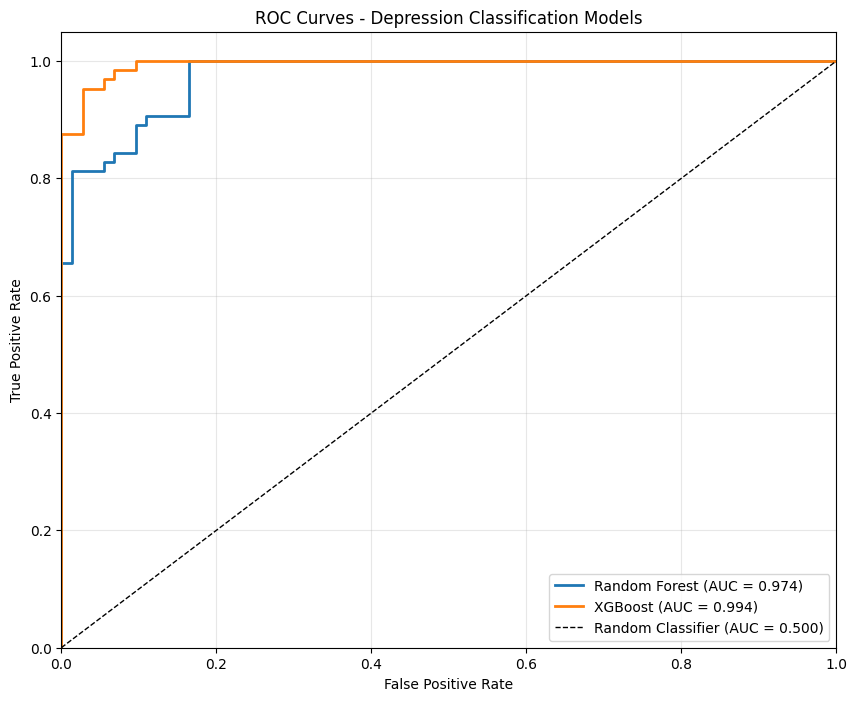

In [68]:
# ROC Curve Comparison
plt.figure(figsize=(10, 8))

# Calculate ROC curves for all models
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_proba_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_proba_xgb)

# Plot ROC curves
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier (AUC = 0.500)', linewidth=1)

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Depression Classification Models')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


3. LOGISTIC REGRESSION
Accuracy: 0.8394
AUC-ROC: 0.9360

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86        73
           1       0.90      0.73      0.81        64

    accuracy                           0.84       137
   macro avg       0.85      0.83      0.84       137
weighted avg       0.85      0.84      0.84       137


Top 10 Most Important Features (by coefficient):
                  Feature  Coefficient  Abs_Coefficient
18    Total_Symptom_Score    -0.651636         0.651636
15      Physical_Symptoms    -0.564413         0.564413
10     Thoughts_Self_Harm    -0.466474         0.466474
6         Appetite_Issues    -0.458886         0.458886
4           Sleep_Trouble    -0.419435         0.419435
17          Risk_Symptoms    -0.383134         0.383134
8   Concentration_Trouble    -0.381080         0.381080
13     Financial_Pressure     0.373260         0.373260
14          Core_Symptoms    -0.370194 

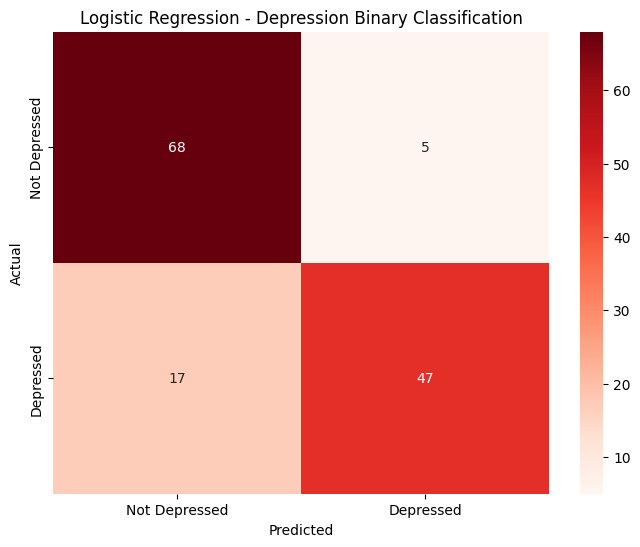

In [69]:
# 3. LOGISTIC REGRESSION - Interpretable baseline
print("="*60)
print("3. LOGISTIC REGRESSION")
print("="*60)

lr_depression = LogisticRegression(
    random_state=42,
    max_iter=1000,
    class_weight='balanced'
)

# Train and evaluate
lr_depression.fit(X_train_scaled, y_train)
y_pred_lr = lr_depression.predict(X_test_scaled)
y_proba_lr = lr_depression.predict_proba(X_test_scaled)[:, 1]

# Performance metrics
accuracy_lr = accuracy_score(y_test, y_pred_lr)
auc_lr = roc_auc_score(y_test, y_proba_lr)

print(f"Accuracy: {accuracy_lr:.4f}")
print(f"AUC-ROC: {auc_lr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

# Feature coefficients
feature_coef_lr = pd.DataFrame({
    'Feature': feature_columns,
    'Coefficient': lr_depression.coef_[0],
    'Abs_Coefficient': np.abs(lr_depression.coef_[0])
}).sort_values('Abs_Coefficient', ascending=False)

print("\nTop 10 Most Important Features (by coefficient):")
print(feature_coef_lr.head(10))

# Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Not Depressed', 'Depressed'],
            yticklabels=['Not Depressed', 'Depressed'])
plt.title('Logistic Regression - Depression Binary Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


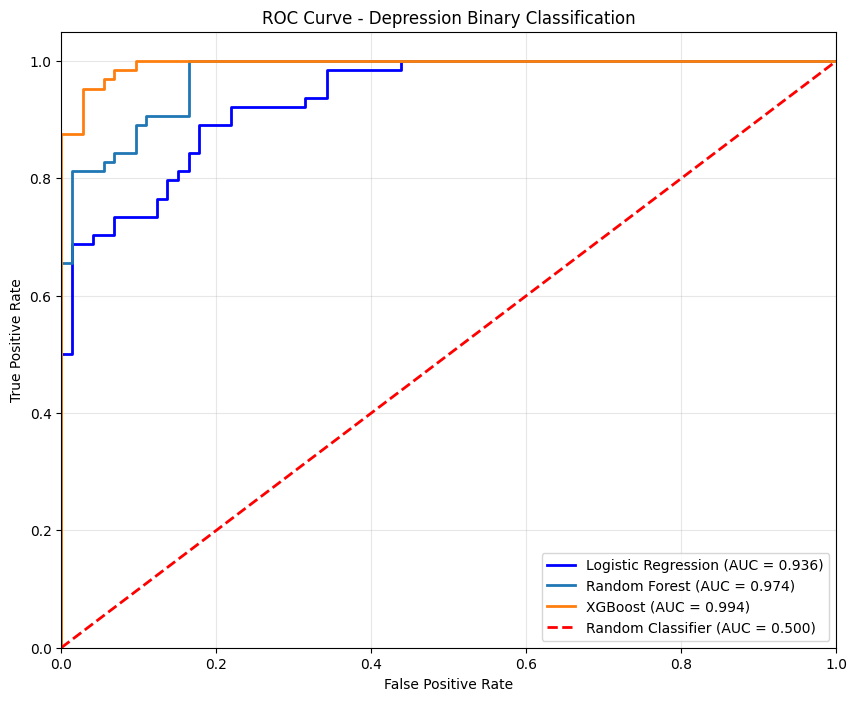

In [71]:
# ROC Curve for Logistic Regression
plt.figure(figsize=(10, 8))
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_proba_lr)
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.3f})', linewidth=2)
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Classifier (AUC = 0.500)')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Depression Binary Classification')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### 2. PHQ_TOTAL REGRESSION
**Continuous Target: Exact PHQ-9 Score Prediction (0-27)**
**Best Models: XGBoost Regressor, Random Forest Regressor, Linear Regression**


In [72]:
# Prepare data for PHQ_Total regression
# Use all features except PHQ-related targets
regression_feature_columns = [col for col in data.columns if col not in ['PHQ_Total', 'PHQ_Severity', 'Depression_Binary', 'High_Risk', 'Suicidal_Risk']]
X_reg = data[regression_feature_columns]
y_phq_total = data['PHQ_Total']

print(f"Features for PHQ_Total regression: {len(regression_feature_columns)}")
print(f"Target statistics: {y_phq_total.describe()}")

# Train-test split for regression
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(X_reg, y_phq_total, test_size=0.2, random_state=42)

# Standardize features
scaler_reg = StandardScaler()
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)

print(f"\nTraining set: {X_train_reg.shape[0]} samples")
print(f"Test set: {X_test_reg.shape[0]} samples")
print(f"Training target stats: {y_train_reg.describe()}")
print(f"Test target stats: {y_test_reg.describe()}")


Features for PHQ_Total regression: 19
Target statistics: count    682.000000
mean       9.903226
std        7.221034
min        0.000000
25%        4.000000
50%        9.000000
75%       15.000000
max       27.000000
Name: PHQ_Total, dtype: float64

Training set: 545 samples
Test set: 137 samples
Training target stats: count    545.000000
mean       9.704587
std        7.142643
min        0.000000
25%        4.000000
50%        9.000000
75%       15.000000
max       27.000000
Name: PHQ_Total, dtype: float64
Test target stats: count    137.000000
mean      10.693431
std        7.499571
min        0.000000
25%        4.000000
50%       10.000000
75%       16.000000
max       27.000000
Name: PHQ_Total, dtype: float64


1. XGBOOST REGRESSOR
RMSE: 1.5892
R² Score: 0.9548
Mean Absolute Error: 1.0548

Top 10 Most Important Features:
                   Feature  Importance
18     Total_Symptom_Score    0.460450
6          Appetite_Issues    0.098087
10      Thoughts_Self_Harm    0.060213
16      Cognitive_Symptoms    0.050970
5         Tired_Low_Energy    0.050245
2        Interest_Pleasure    0.044131
17           Risk_Symptoms    0.038660
4            Sleep_Trouble    0.036230
9   Moving_Speaking_Issues    0.033737
3             Feeling_Down    0.032849


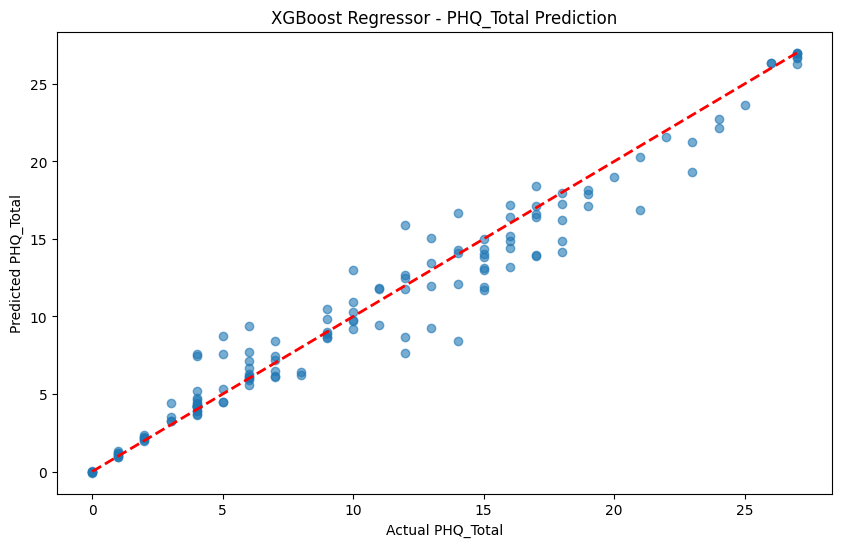

In [73]:
# 1. XGBOOST REGRESSOR - Best for PHQ_Total prediction
print("="*60)
print("1. XGBOOST REGRESSOR")
print("="*60)

xgb_regressor = xgb.XGBRegressor(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

# Train and evaluate
xgb_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_xgb_reg = xgb_regressor.predict(X_test_reg_scaled)

# Performance metrics
mse_xgb_reg = mean_squared_error(y_test_reg, y_pred_xgb_reg)
rmse_xgb_reg = np.sqrt(mse_xgb_reg)
r2_xgb_reg = r2_score(y_test_reg, y_pred_xgb_reg)

print(f"RMSE: {rmse_xgb_reg:.4f}")
print(f"R² Score: {r2_xgb_reg:.4f}")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test_reg - y_pred_xgb_reg)):.4f}")

# Feature importance
feature_importance_xgb_reg = pd.DataFrame({
    'Feature': regression_feature_columns,
    'Importance': xgb_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_xgb_reg.head(10))

# Prediction vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_xgb_reg, alpha=0.6)
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual PHQ_Total')
plt.ylabel('Predicted PHQ_Total')
plt.title('XGBoost Regressor - PHQ_Total Prediction')
plt.show()


2. RANDOM FOREST REGRESSOR
RMSE: 2.7206
R² Score: 0.8674
Mean Absolute Error: 2.0072

Top 10 Most Important Features:
                Feature  Importance
18  Total_Symptom_Score    0.771782
2     Interest_Pleasure    0.047875
3          Feeling_Down    0.027022
16   Cognitive_Symptoms    0.021154
10   Thoughts_Self_Harm    0.021018
17        Risk_Symptoms    0.018251
5      Tired_Low_Energy    0.017145
4         Sleep_Trouble    0.013366
6       Appetite_Issues    0.011444
14        Core_Symptoms    0.010527


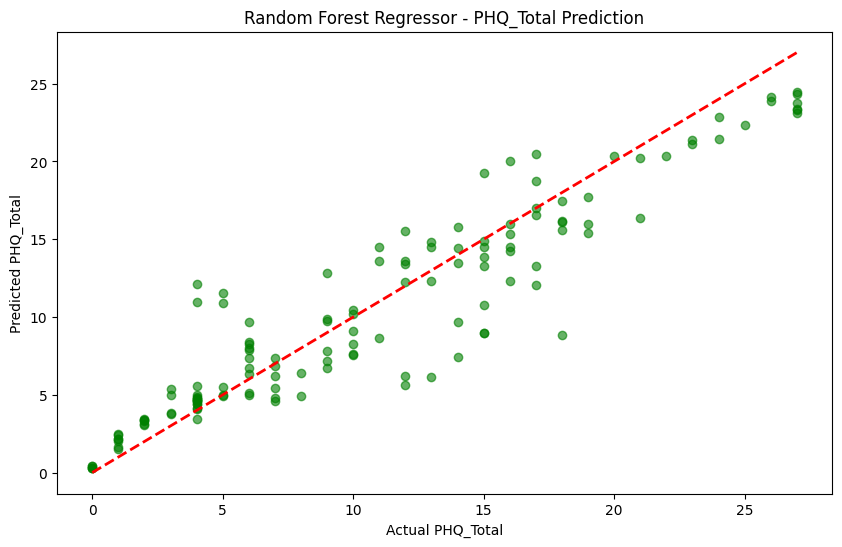

In [74]:
# 2. RANDOM FOREST REGRESSOR
print("="*60)
print("2. RANDOM FOREST REGRESSOR")
print("="*60)

rf_regressor = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

# Train and evaluate
rf_regressor.fit(X_train_reg_scaled, y_train_reg)
y_pred_rf_reg = rf_regressor.predict(X_test_reg_scaled)

# Performance metrics
mse_rf_reg = mean_squared_error(y_test_reg, y_pred_rf_reg)
rmse_rf_reg = np.sqrt(mse_rf_reg)
r2_rf_reg = r2_score(y_test_reg, y_pred_rf_reg)

print(f"RMSE: {rmse_rf_reg:.4f}")
print(f"R² Score: {r2_rf_reg:.4f}")
print(f"Mean Absolute Error: {np.mean(np.abs(y_test_reg - y_pred_rf_reg)):.4f}")

# Feature importance
feature_importance_rf_reg = pd.DataFrame({
    'Feature': regression_feature_columns,
    'Importance': rf_regressor.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_rf_reg.head(10))

# Prediction vs Actual plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reg, y_pred_rf_reg, alpha=0.6, color='green')
plt.plot([y_test_reg.min(), y_test_reg.max()], [y_test_reg.min(), y_test_reg.max()], 'r--', lw=2)
plt.xlabel('Actual PHQ_Total')
plt.ylabel('Predicted PHQ_Total')
plt.title('Random Forest Regressor - PHQ_Total Prediction')
plt.show()


### 3. PHQ_SEVERITY MULTI-CLASS CLASSIFICATION
**Multi-Class Target: Severity Levels (0-4)**
**Best Models: XGBoost, Random Forest, Logistic Regression (Multinomial)**


In [75]:
# Prepare data for PHQ_Severity multi-class classification
# Use all features except severity-related targets
severity_feature_columns = [col for col in data.columns if col not in ['PHQ_Severity', 'PHQ_Total', 'Depression_Binary', 'High_Risk', 'Suicidal_Risk']]
X_sev = data[severity_feature_columns]
y_severity = data['PHQ_Severity']

print(f"Features for PHQ_Severity classification: {len(severity_feature_columns)}")
print(f"Severity distribution: {y_severity.value_counts().sort_index()}")
print(f"Severity distribution (%): {y_severity.value_counts(normalize=True).sort_index() * 100}")

# Train-test split for severity classification
X_train_sev, X_test_sev, y_train_sev, y_test_sev = train_test_split(X_sev, y_severity, test_size=0.2, random_state=42, stratify=y_severity)

# Standardize features
scaler_sev = StandardScaler()
X_train_sev_scaled = scaler_sev.fit_transform(X_train_sev)
X_test_sev_scaled = scaler_sev.transform(X_test_sev)

print(f"\nTraining set: {X_train_sev.shape[0]} samples")
print(f"Test set: {X_test_sev.shape[0]} samples")
print(f"Training severity distribution: {y_train_sev.value_counts().sort_index()}")
print(f"Test severity distribution: {y_test_sev.value_counts().sort_index()}")

# Define severity labels for interpretation
severity_labels = {0: 'Minimal', 1: 'Mild', 2: 'Moderate', 3: 'Moderately Severe', 4: 'Severe'}
print(f"\nSeverity labels: {severity_labels}")


Features for PHQ_Severity classification: 19
Severity distribution: PHQ_Severity
0    155
1    206
2    128
3    125
4     68
Name: count, dtype: int64
Severity distribution (%): PHQ_Severity
0    22.727273
1    30.205279
2    18.768328
3    18.328446
4     9.970674
Name: proportion, dtype: float64

Training set: 545 samples
Test set: 137 samples
Training severity distribution: PHQ_Severity
0    124
1    165
2    102
3    100
4     54
Name: count, dtype: int64
Test severity distribution: PHQ_Severity
0    31
1    41
2    26
3    25
4    14
Name: count, dtype: int64

Severity labels: {0: 'Minimal', 1: 'Mild', 2: 'Moderate', 3: 'Moderately Severe', 4: 'Severe'}


1. XGBOOST MULTI-CLASS CLASSIFIER
Accuracy: 0.7883

Classification Report:
                   precision    recall  f1-score   support

          Minimal       0.68      0.74      0.71        31
             Mild       0.95      0.95      0.95        41
         Moderate       0.68      0.58      0.62        26
Moderately Severe       0.74      0.80      0.77        25
           Severe       0.85      0.79      0.81        14

         accuracy                           0.79       137
        macro avg       0.78      0.77      0.77       137
     weighted avg       0.79      0.79      0.79       137


Top 10 Most Important Features:
                   Feature  Importance
18     Total_Symptom_Score    0.151401
15       Physical_Symptoms    0.082001
14           Core_Symptoms    0.070710
16      Cognitive_Symptoms    0.065465
5         Tired_Low_Energy    0.055474
6          Appetite_Issues    0.054849
17           Risk_Symptoms    0.052176
7   Feeling_Bad_About_Self    0.049876
4      

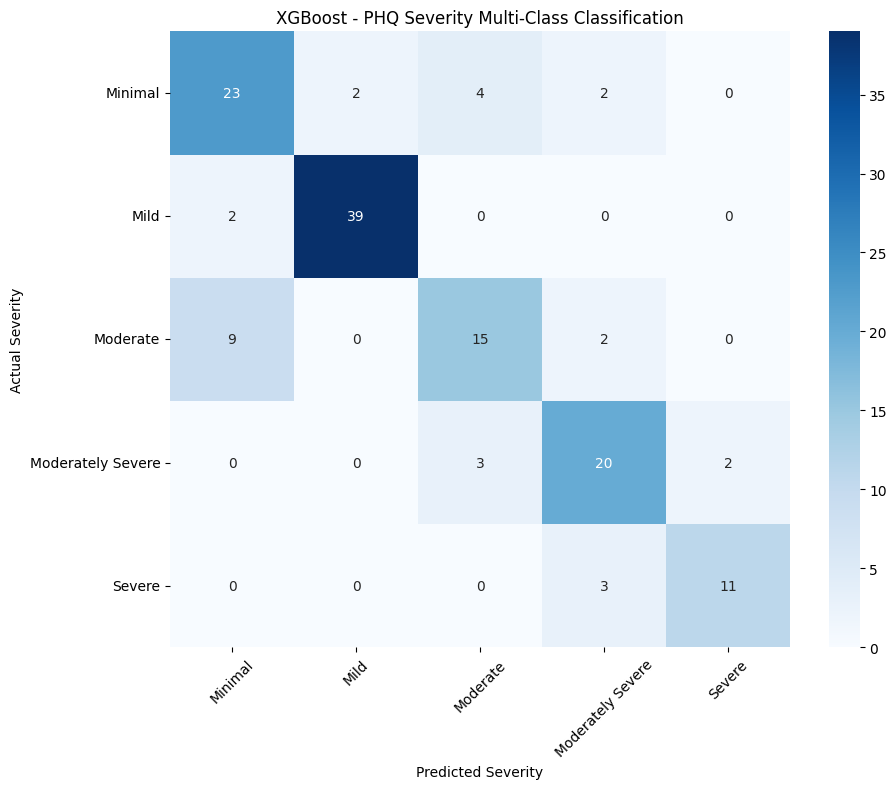

In [76]:
# 1. XGBOOST MULTI-CLASS CLASSIFIER
print("="*60)
print("1. XGBOOST MULTI-CLASS CLASSIFIER")
print("="*60)

xgb_severity = xgb.XGBClassifier(
    n_estimators=100,
    max_depth=6,
    learning_rate=0.1,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='mlogloss'
)

# Train and evaluate
xgb_severity.fit(X_train_sev_scaled, y_train_sev)
y_pred_xgb_sev = xgb_severity.predict(X_test_sev_scaled)

# Performance metrics
accuracy_xgb_sev = accuracy_score(y_test_sev, y_pred_xgb_sev)

print(f"Accuracy: {accuracy_xgb_sev:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_sev, y_pred_xgb_sev, target_names=[severity_labels[i] for i in range(5)]))

# Feature importance
feature_importance_xgb_sev = pd.DataFrame({
    'Feature': severity_feature_columns,
    'Importance': xgb_severity.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features:")
print(feature_importance_xgb_sev.head(10))

# Confusion Matrix
cm_xgb_sev = confusion_matrix(y_test_sev, y_pred_xgb_sev)
plt.figure(figsize=(10, 8))
sns.heatmap(cm_xgb_sev, annot=True, fmt='d', cmap='Blues',
            xticklabels=[severity_labels[i] for i in range(5)],
            yticklabels=[severity_labels[i] for i in range(5)])
plt.title('XGBoost - PHQ Severity Multi-Class Classification')
plt.ylabel('Actual Severity')
plt.xlabel('Predicted Severity')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()


### 4. HIGH_RISK BINARY CLASSIFICATION
**Binary Target: High-Risk Depression (≥15 PHQ score)**
**Best Models: Random Forest, XGBoost, Logistic Regression**


In [77]:
# Prepare data for High_Risk classification
# Use all features except risk-related targets
high_risk_feature_columns = [col for col in data.columns if col not in ['High_Risk', 'Suicidal_Risk', 'PHQ_Total', 'PHQ_Severity', 'Depression_Binary']]
X_hr = data[high_risk_feature_columns]
y_high_risk = data['High_Risk']

print(f"Features for High_Risk classification: {len(high_risk_feature_columns)}")
print(f"High_Risk distribution: {y_high_risk.value_counts()}")
print(f"High_Risk distribution (%): {y_high_risk.value_counts(normalize=True) * 100}")

# Train-test split for high risk classification
X_train_hr, X_test_hr, y_train_hr, y_test_hr = train_test_split(X_hr, y_high_risk, test_size=0.2, random_state=42, stratify=y_high_risk)

# Standardize features
scaler_hr = StandardScaler()
X_train_hr_scaled = scaler_hr.fit_transform(X_train_hr)
X_test_hr_scaled = scaler_hr.transform(X_test_hr)

print(f"\nTraining set: {X_train_hr.shape[0]} samples")
print(f"Test set: {X_test_hr.shape[0]} samples")
print(f"Training High_Risk distribution: {y_train_hr.value_counts()}")
print(f"Test High_Risk distribution: {y_test_hr.value_counts()}")


Features for High_Risk classification: 19
High_Risk distribution: High_Risk
0    489
1    193
Name: count, dtype: int64
High_Risk distribution (%): High_Risk
0    71.70088
1    28.29912
Name: proportion, dtype: float64

Training set: 545 samples
Test set: 137 samples
Training High_Risk distribution: High_Risk
0    391
1    154
Name: count, dtype: int64
Test High_Risk distribution: High_Risk
0    98
1    39
Name: count, dtype: int64


1. RANDOM FOREST - HIGH_RISK CLASSIFICATION
Accuracy: 0.8832
AUC-ROC: 0.9851

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91        98
           1       0.72      0.97      0.83        39

    accuracy                           0.88       137
   macro avg       0.85      0.91      0.87       137
weighted avg       0.91      0.88      0.89       137


Top 10 Most Important Features for High_Risk:
                   Feature  Importance
18     Total_Symptom_Score    0.272807
4            Sleep_Trouble    0.134736
6          Appetite_Issues    0.086663
15       Physical_Symptoms    0.070363
10      Thoughts_Self_Harm    0.063801
7   Feeling_Bad_About_Self    0.062917
9   Moving_Speaking_Issues    0.061396
8    Concentration_Trouble    0.053374
2        Interest_Pleasure    0.046423
5         Tired_Low_Energy    0.039744


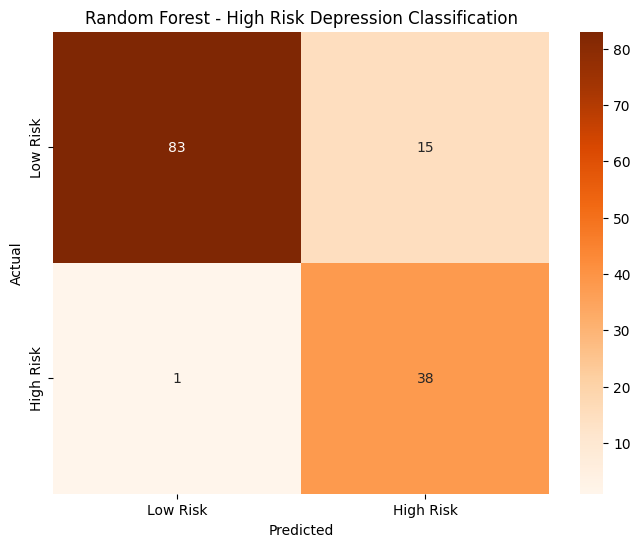

In [78]:
# 1. RANDOM FOREST for HIGH_RISK
print("="*60)
print("1. RANDOM FOREST - HIGH_RISK CLASSIFICATION")
print("="*60)

rf_high_risk = RandomForestClassifier(
    n_estimators=100,
    max_depth=10,
    min_samples_split=20,
    min_samples_leaf=10,
    class_weight='balanced',
    random_state=42
)

# Train and evaluate
rf_high_risk.fit(X_train_hr_scaled, y_train_hr)
y_pred_rf_hr = rf_high_risk.predict(X_test_hr_scaled)
y_proba_rf_hr = rf_high_risk.predict_proba(X_test_hr_scaled)[:, 1]

# Performance metrics
accuracy_rf_hr = accuracy_score(y_test_hr, y_pred_rf_hr)
auc_rf_hr = roc_auc_score(y_test_hr, y_proba_rf_hr)

print(f"Accuracy: {accuracy_rf_hr:.4f}")
print(f"AUC-ROC: {auc_rf_hr:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_hr, y_pred_rf_hr))

# Feature importance
feature_importance_rf_hr = pd.DataFrame({
    'Feature': high_risk_feature_columns,
    'Importance': rf_high_risk.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features for High_Risk:")
print(feature_importance_rf_hr.head(10))

# Confusion Matrix
cm_rf_hr = confusion_matrix(y_test_hr, y_pred_rf_hr)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_hr, annot=True, fmt='d', cmap='Oranges', 
            xticklabels=['Low Risk', 'High Risk'],
            yticklabels=['Low Risk', 'High Risk'])
plt.title('Random Forest - High Risk Depression Classification')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()


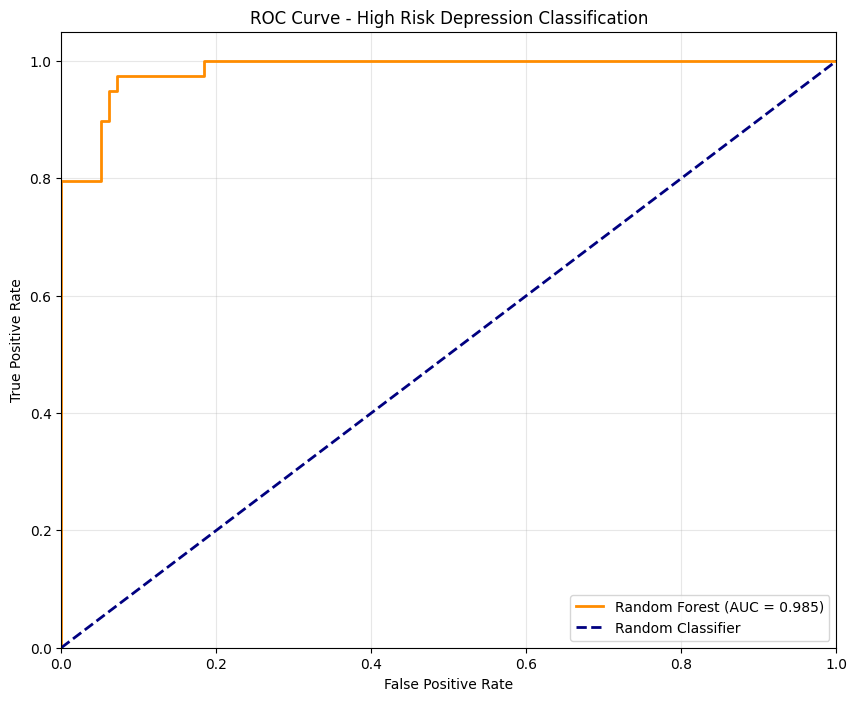

In [79]:
# ROC Curve for High Risk Classification
plt.figure(figsize=(10, 8))
fpr_rf_hr, tpr_rf_hr, _ = roc_curve(y_test_hr, y_proba_rf_hr)
plt.plot(fpr_rf_hr, tpr_rf_hr, color='darkorange', lw=2, 
         label=f'Random Forest (AUC = {auc_rf_hr:.3f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - High Risk Depression Classification')
plt.legend(loc="lower right")
plt.grid(True, alpha=0.3)
plt.show()


### 5. SUICIDAL_RISK BINARY CLASSIFICATION
**Binary Target: Suicidal Ideation Risk (Critical for Safety)**
**Best Models: Random Forest, XGBoost (Highest Priority)**


In [80]:
# Prepare data for Suicidal_Risk classification (CRITICAL TARGET)
# Use all features except suicidal-related targets
suicidal_feature_columns = [col for col in data.columns if col not in ['Suicidal_Risk', 'High_Risk', 'PHQ_Total', 'PHQ_Severity', 'Depression_Binary']]
X_suicidal = data[suicidal_feature_columns]
y_suicidal = data['Suicidal_Risk']

print(f"Features for Suicidal_Risk classification: {len(suicidal_feature_columns)}")
print(f"Suicidal_Risk distribution: {y_suicidal.value_counts()}")
print(f"Suicidal_Risk distribution (%): {y_suicidal.value_counts(normalize=True) * 100}")

# Train-test split for suicidal risk classification
X_train_suicidal, X_test_suicidal, y_train_suicidal, y_test_suicidal = train_test_split(
    X_suicidal, y_suicidal, test_size=0.2, random_state=42, stratify=y_suicidal)

# Standardize features
scaler_suicidal = StandardScaler()
X_train_suicidal_scaled = scaler_suicidal.fit_transform(X_train_suicidal)
X_test_suicidal_scaled = scaler_suicidal.transform(X_test_suicidal)

print(f"\nTraining set: {X_train_suicidal.shape[0]} samples")
print(f"Test set: {X_test_suicidal.shape[0]} samples")
print(f"Training Suicidal_Risk distribution: {y_train_suicidal.value_counts()}")
print(f"Test Suicidal_Risk distribution: {y_test_suicidal.value_counts()}")

print("\n⚠️  CRITICAL: This model is for identifying suicidal ideation risk - requires high precision!")


Features for Suicidal_Risk classification: 19
Suicidal_Risk distribution: Suicidal_Risk
1    454
0    228
Name: count, dtype: int64
Suicidal_Risk distribution (%): Suicidal_Risk
1    66.568915
0    33.431085
Name: proportion, dtype: float64

Training set: 545 samples
Test set: 137 samples
Training Suicidal_Risk distribution: Suicidal_Risk
1    363
0    182
Name: count, dtype: int64
Test Suicidal_Risk distribution: Suicidal_Risk
1    91
0    46
Name: count, dtype: int64

⚠️  CRITICAL: This model is for identifying suicidal ideation risk - requires high precision!


1. RANDOM FOREST - SUICIDAL_RISK CLASSIFICATION
Accuracy: 1.0000
AUC-ROC: 1.0000

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        46
           1       1.00      1.00      1.00        91

    accuracy                           1.00       137
   macro avg       1.00      1.00      1.00       137
weighted avg       1.00      1.00      1.00       137


Top 10 Most Important Features for Suicidal_Risk:
                   Feature  Importance
10      Thoughts_Self_Harm    0.441036
17           Risk_Symptoms    0.221171
18     Total_Symptom_Score    0.102212
15       Physical_Symptoms    0.029258
9   Moving_Speaking_Issues    0.029095
5         Tired_Low_Energy    0.027847
16      Cognitive_Symptoms    0.021288
3             Feeling_Down    0.021125
4            Sleep_Trouble    0.017362
14           Core_Symptoms    0.016948


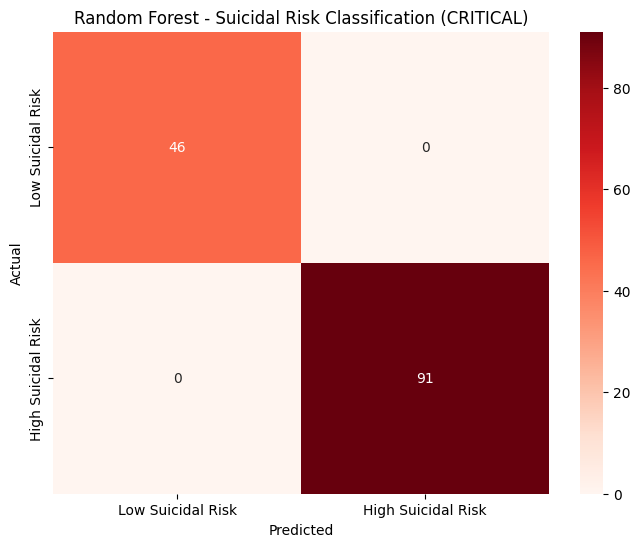


⚠️  IMPORTANT: False negatives (missed suicidal risk) are critical errors!
Focus on high recall for suicidal risk detection.


In [81]:
# 1. RANDOM FOREST for SUICIDAL_RISK (CRITICAL MODEL)
print("="*60)
print("1. RANDOM FOREST - SUICIDAL_RISK CLASSIFICATION")
print("="*60)

rf_suicidal = RandomForestClassifier(
    n_estimators=200,  # More trees for critical predictions
    max_depth=8,
    min_samples_split=10,
    min_samples_leaf=5,
    class_weight='balanced',  # Important for imbalanced suicidal risk
    random_state=42
)

# Train and evaluate
rf_suicidal.fit(X_train_suicidal_scaled, y_train_suicidal)
y_pred_rf_suicidal = rf_suicidal.predict(X_test_suicidal_scaled)
y_proba_rf_suicidal = rf_suicidal.predict_proba(X_test_suicidal_scaled)[:, 1]

# Performance metrics
accuracy_rf_suicidal = accuracy_score(y_test_suicidal, y_pred_rf_suicidal)
auc_rf_suicidal = roc_auc_score(y_test_suicidal, y_proba_rf_suicidal)

print(f"Accuracy: {accuracy_rf_suicidal:.4f}")
print(f"AUC-ROC: {auc_rf_suicidal:.4f}")
print("\nClassification Report:")
print(classification_report(y_test_suicidal, y_pred_rf_suicidal))

# Feature importance for suicidal risk
feature_importance_rf_suicidal = pd.DataFrame({
    'Feature': suicidal_feature_columns,
    'Importance': rf_suicidal.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 Most Important Features for Suicidal_Risk:")
print(feature_importance_rf_suicidal.head(10))

# Confusion Matrix
cm_rf_suicidal = confusion_matrix(y_test_suicidal, y_pred_rf_suicidal)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_suicidal, annot=True, fmt='d', cmap='Reds', 
            xticklabels=['Low Suicidal Risk', 'High Suicidal Risk'],
            yticklabels=['Low Suicidal Risk', 'High Suicidal Risk'])
plt.title('Random Forest - Suicidal Risk Classification (CRITICAL)')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

print("\n⚠️  IMPORTANT: False negatives (missed suicidal risk) are critical errors!")
print("Focus on high recall for suicidal risk detection.")


### 6. EXPLAINABLE AI (XAI) IMPLEMENTATION
**SHAP and LIME Explanations for Model Interpretability**


LIME EXPLANATIONS - LOCAL MODEL INTERPRETABILITY

--- LIME Explanation for Sample 0 ---
Actual Label: 1
Predicted Label: 1



--- LIME Explanation for Sample 1 ---
Actual Label: 1
Predicted Label: 1



--- LIME Explanation for Sample 2 ---
Actual Label: 0
Predicted Label: 0


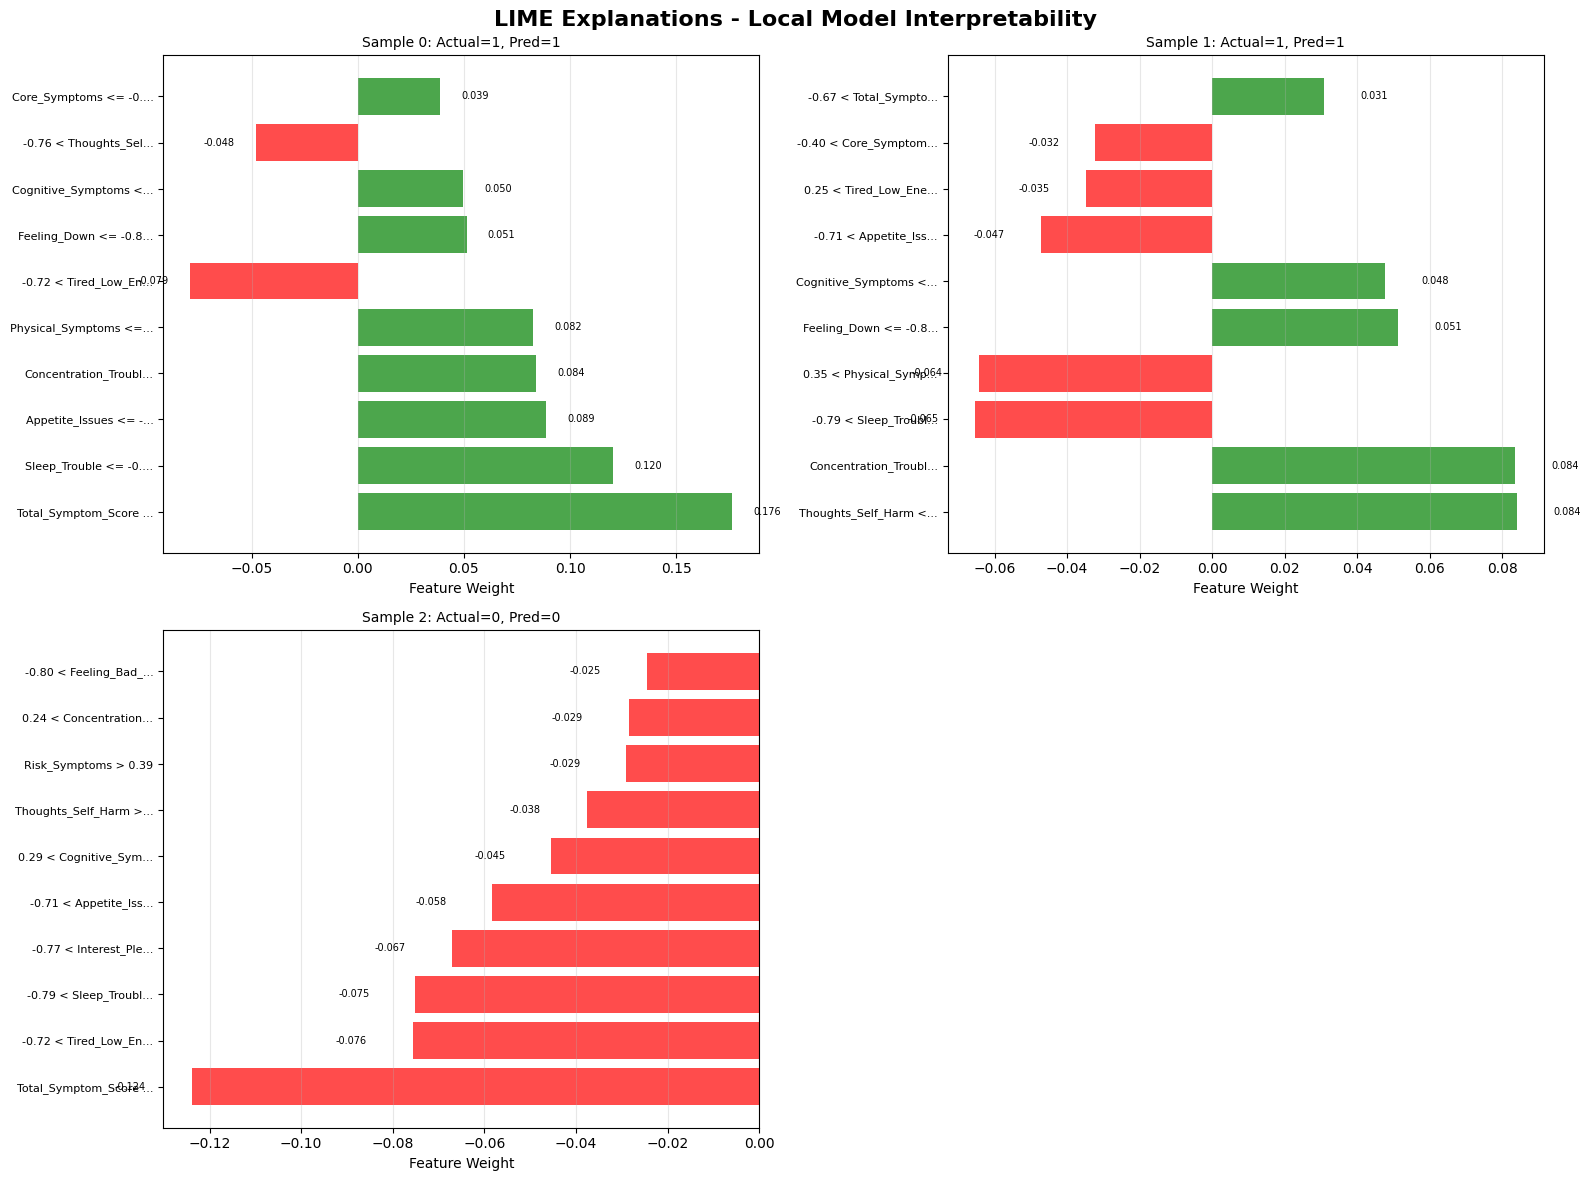

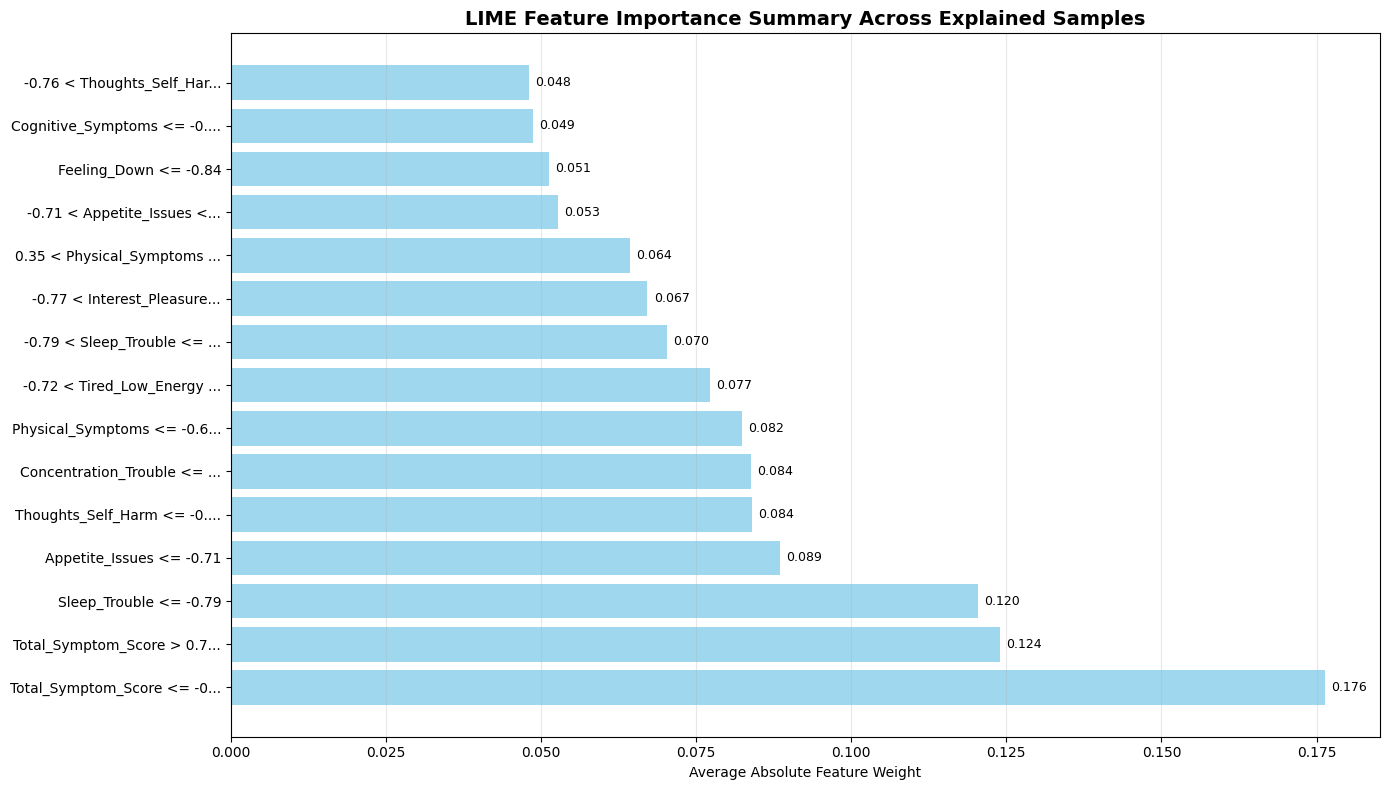

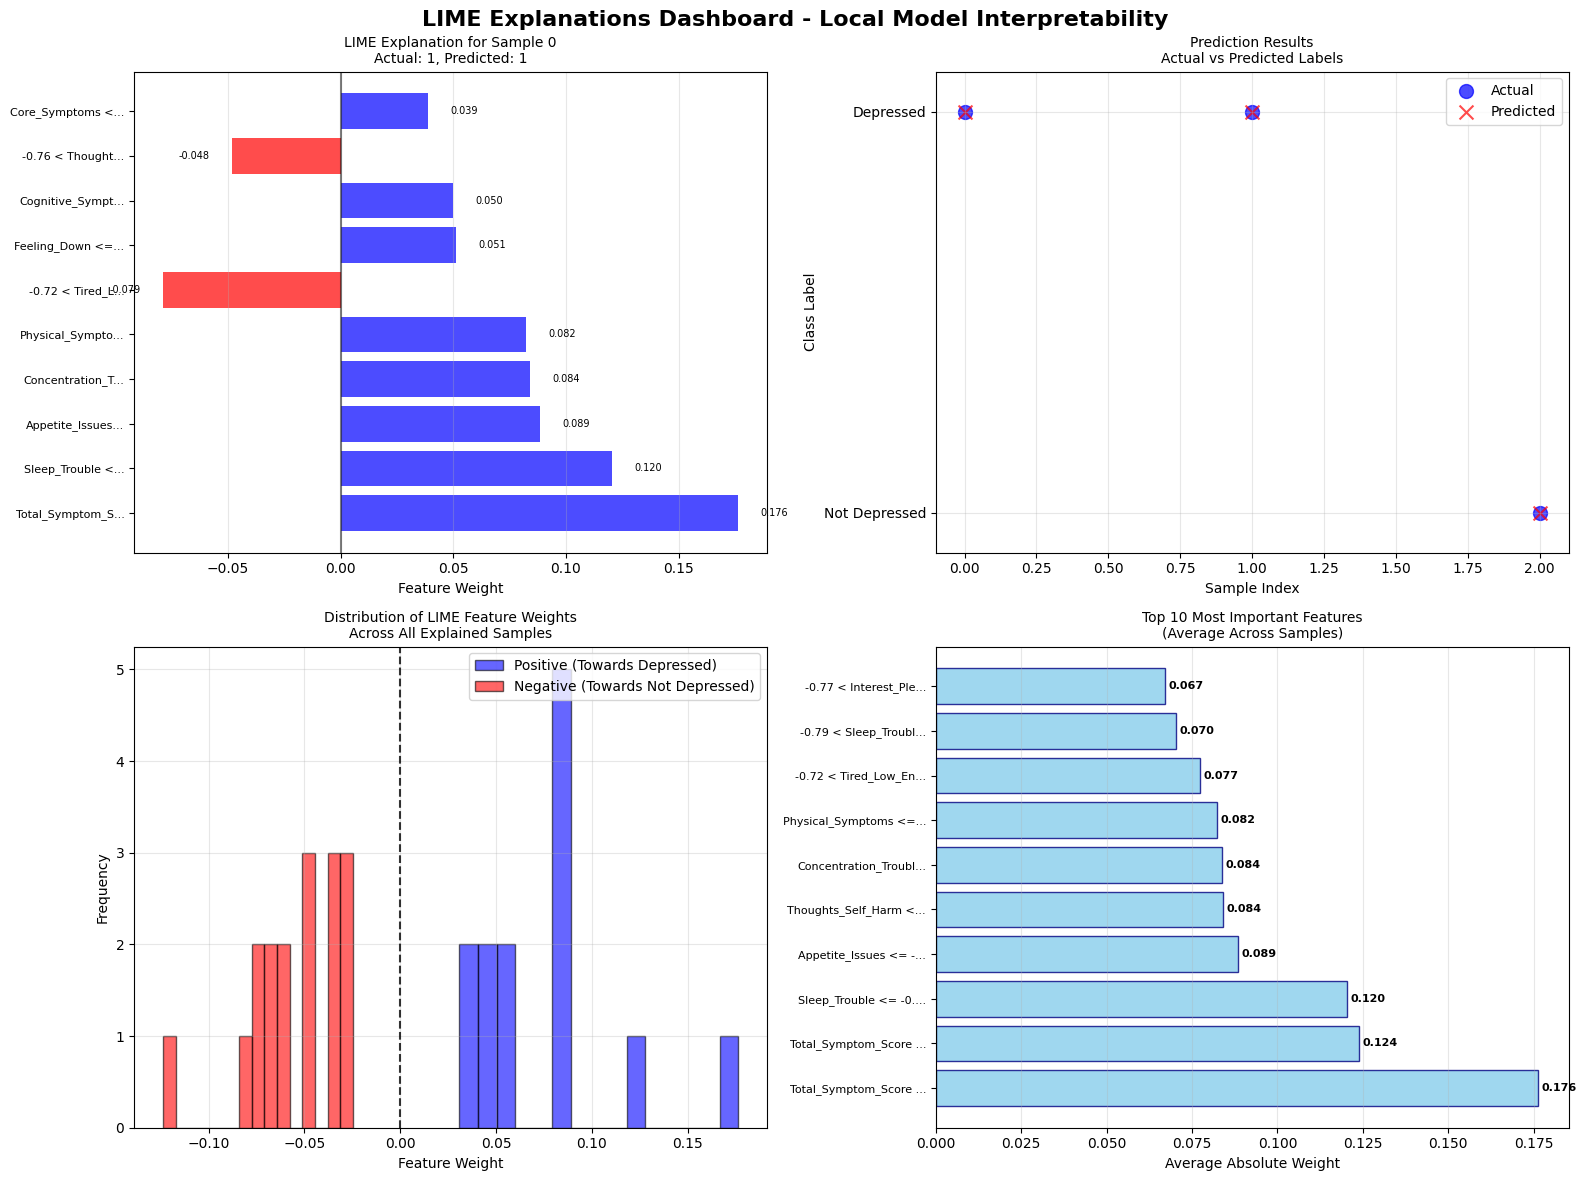


📊 LIME EXPLANATION SUMMARY TABLE
 Sample_ID  Actual_Label  Predicted_Label  Prediction_Correct         Top_Positive_Feature             Top_Negative_Feature  Strongest_Weight
         0             1                1                True Total_Symptom_Score <= -0.67 -0.72 < Tired_Low_Energy <= 0.25          0.176408
         1             1                1                True  Thoughts_Self_Harm <= -0.76    -0.79 < Sleep_Trouble <= 0.20          0.084059
         2             0                0                True                         None       Total_Symptom_Score > 0.73         -0.123917

✅ LIME explanations and comprehensive visualizations generated successfully!
📊 Explained 3 samples with detailed feature contributions
🎯 Key Insights:
   • Most influential positive feature: Total_Symptom_Score <= -0.67
   • Average feature importance: 0.0826
   • Prediction accuracy on explained samples: 100.0%


In [90]:
# LIME EXPLANATIONS FOR LOCAL INTERPRETABILITY
if LIME_AVAILABLE:
    print("="*60)
    print("LIME EXPLANATIONS - LOCAL MODEL INTERPRETABILITY")
    print("="*60)
    
    # Create LIME explainer
    lime_explainer = lime_tabular.LimeTabularExplainer(
        X_train_scaled,
        feature_names=feature_columns,
        class_names=['Not Depressed', 'Depressed'],
        mode='classification'
    )
    
    # Explain a few predictions and create visualizations
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('LIME Explanations - Local Model Interpretability', fontsize=16, fontweight='bold')
    
    explanations_data = []
    
    for i in range(min(3, len(X_test_scaled))):
        print(f"\n--- LIME Explanation for Sample {i} ---")
        print(f"Actual Label: {y_test.iloc[i]}")
        print(f"Predicted Label: {y_pred_rf[i]}")
        
        # Generate explanation
        explanation = lime_explainer.explain_instance(
            X_test_scaled[i], 
            rf_depression.predict_proba,
            num_features=10
        )
        
        # Extract feature contributions for visualization
        feature_weights = explanation.as_list()
        features = [fw[0] for fw in feature_weights]
        weights = [fw[1] for fw in feature_weights]
        
        explanations_data.append({
            'sample': i,
            'actual': y_test.iloc[i],
            'predicted': y_pred_rf[i],
            'features': features,
            'weights': weights
        })
        
        # Create bar plot for this sample
        if i < 3:  # Only plot first 3 samples
            row = i // 2
            col = i % 2
            ax = axes[row, col] if i < 2 else axes[1, 0]
            
            colors = ['red' if w < 0 else 'green' for w in weights]
            bars = ax.barh(range(len(features)), weights, color=colors, alpha=0.7)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels([f[:20] + '...' if len(f) > 20 else f for f in features], fontsize=8)
            ax.set_xlabel('Feature Weight')
            ax.set_title(f'Sample {i}: Actual={y_test.iloc[i]}, Pred={y_pred_rf[i]}', fontsize=10)
            ax.grid(axis='x', alpha=0.3)
            
            # Add value labels on bars
            for bar, weight in zip(bars, weights):
                width = bar.get_width()
                ax.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                       f'{weight:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=7)
        
        # Show explanation as HTML
        try:
            from IPython.display import display, HTML
            display(HTML(explanation.as_html()))
        except ImportError:
            # Fallback to text-based explanation if IPython display is not available
            print("Feature contributions:")
            for feature, weight in explanation.as_list():
                print(f"  {feature}: {weight:.4f}")
    
    # Remove empty subplot
    if len(explanations_data) < 4:
        fig.delaxes(axes[1, 1])
    
    plt.tight_layout()
    plt.show()
    
    # Create summary visualization of feature importance across samples
    plt.figure(figsize=(14, 8))
    
    # Aggregate feature importance across all explained samples
    all_features = set()
    for exp in explanations_data:
        all_features.update(exp['features'])
    
    feature_importance_summary = {}
    for feature in all_features:
        weights = []
        for exp in explanations_data:
            if feature in exp['features']:
                idx = exp['features'].index(feature)
                weights.append(abs(exp['weights'][idx]))
        feature_importance_summary[feature] = np.mean(weights) if weights else 0
    
    # Sort by importance
    sorted_features = sorted(feature_importance_summary.items(), key=lambda x: x[1], reverse=True)
    top_features = sorted_features[:15]  # Top 15 features
    
    features_names = [f[0][:25] + '...' if len(f[0]) > 25 else f[0] for f in top_features]
    importance_values = [f[1] for f in top_features]
    
    plt.barh(range(len(features_names)), importance_values, color='skyblue', alpha=0.8)
    plt.yticks(range(len(features_names)), features_names)
    plt.xlabel('Average Absolute Feature Weight')
    plt.title('LIME Feature Importance Summary Across Explained Samples', fontsize=14, fontweight='bold')
    plt.grid(axis='x', alpha=0.3)
    
    # Add value labels
    for i, v in enumerate(importance_values):
        plt.text(v + 0.001, i, f'{v:.3f}', va='center', fontsize=9)
    
    plt.tight_layout()
    plt.show()
    
    # Create a comprehensive LIME results diagram similar to the image format
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('LIME Explanations Dashboard - Local Model Interpretability', fontsize=16, fontweight='bold')
    
    # Top left: Feature importance for Sample 0
    if len(explanations_data) > 0:
        exp = explanations_data[0]
        colors = ['red' if w < 0 else 'blue' for w in exp['weights']]
        bars = ax1.barh(range(len(exp['features'])), exp['weights'], color=colors, alpha=0.7)
        ax1.set_yticks(range(len(exp['features'])))
        ax1.set_yticklabels([f[:15] + '...' if len(f) > 15 else f for f in exp['features']], fontsize=8)
        ax1.set_xlabel('Feature Weight')
        ax1.set_title(f'LIME Explanation for Sample 0\nActual: {exp["actual"]}, Predicted: {exp["predicted"]}', fontsize=10)
        ax1.grid(axis='x', alpha=0.3)
        ax1.axvline(x=0, color='black', linestyle='-', alpha=0.5)
        
        # Add value labels on bars
        for bar, weight in zip(bars, exp['weights']):
            width = bar.get_width()
            ax1.text(width + (0.01 if width >= 0 else -0.01), bar.get_y() + bar.get_height()/2,
                    f'{weight:.3f}', ha='left' if width >= 0 else 'right', va='center', fontsize=7)
    
    # Top right: Prediction confidence and class probabilities
    sample_indices = list(range(len(explanations_data)))
    actual_labels = [exp['actual'] for exp in explanations_data]
    predicted_labels = [exp['predicted'] for exp in explanations_data]
    
    ax2.scatter(sample_indices, actual_labels, color='blue', label='Actual', s=100, alpha=0.7, marker='o')
    ax2.scatter(sample_indices, predicted_labels, color='red', label='Predicted', s=100, alpha=0.7, marker='x')
    ax2.set_xlabel('Sample Index')
    ax2.set_ylabel('Class Label')
    ax2.set_title('Prediction Results\nActual vs Predicted Labels', fontsize=10)
    ax2.legend()
    ax2.grid(True, alpha=0.3)
    ax2.set_ylim(-0.1, 1.1)
    ax2.set_yticks([0, 1])
    ax2.set_yticklabels(['Not Depressed', 'Depressed'])
    
    # Bottom left: Feature weight distribution
    all_weights = []
    positive_weights = []
    negative_weights = []
    for exp in explanations_data:
        all_weights.extend(exp['weights'])
        positive_weights.extend([w for w in exp['weights'] if w > 0])
        negative_weights.extend([w for w in exp['weights'] if w < 0])
    
    ax3.hist(positive_weights, bins=15, color='blue', alpha=0.6, label='Positive (Towards Depressed)', edgecolor='black')
    ax3.hist(negative_weights, bins=15, color='red', alpha=0.6, label='Negative (Towards Not Depressed)', edgecolor='black')
    ax3.axvline(x=0, color='black', linestyle='--', alpha=0.8)
    ax3.set_xlabel('Feature Weight')
    ax3.set_ylabel('Frequency')
    ax3.set_title('Distribution of LIME Feature Weights\nAcross All Explained Samples', fontsize=10)
    ax3.legend()
    ax3.grid(True, alpha=0.3)
    
    # Bottom right: Top features summary with values
    if len(top_features) > 0:
        top_10_features = top_features[:10]
        feature_names_short = [f[0][:20] + '...' if len(f[0]) > 20 else f[0] for f in top_10_features]
        importance_vals = [f[1] for f in top_10_features]
        
        bars = ax4.barh(range(len(feature_names_short)), importance_vals, color='skyblue', alpha=0.8, edgecolor='navy')
        ax4.set_yticks(range(len(feature_names_short)))
        ax4.set_yticklabels(feature_names_short, fontsize=8)
        ax4.set_xlabel('Average Absolute Weight')
        ax4.set_title('Top 10 Most Important Features\n(Average Across Samples)', fontsize=10)
        ax4.grid(axis='x', alpha=0.3)
        
        # Add value labels on bars
        for i, (bar, val) in enumerate(zip(bars, importance_vals)):
            ax4.text(val + 0.001, i, f'{val:.3f}', va='center', fontsize=8, fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Create detailed summary table
    print("\n" + "="*80)
    print("📊 LIME EXPLANATION SUMMARY TABLE")
    print("="*80)
    
    summary_df = pd.DataFrame({
        'Sample_ID': [exp['sample'] for exp in explanations_data],
        'Actual_Label': [exp['actual'] for exp in explanations_data],
        'Predicted_Label': [exp['predicted'] for exp in explanations_data],
        'Prediction_Correct': [exp['actual'] == exp['predicted'] for exp in explanations_data],
        'Top_Positive_Feature': [max([(f, w) for f, w in zip(exp['features'], exp['weights']) if w > 0], 
                                    key=lambda x: x[1], default=('None', 0))[0] for exp in explanations_data],
        'Top_Negative_Feature': [min([(f, w) for f, w in zip(exp['features'], exp['weights']) if w < 0], 
                                    key=lambda x: x[1], default=('None', 0))[0] for exp in explanations_data],
        'Strongest_Weight': [max(exp['weights'], key=abs) for exp in explanations_data]
    })
    
    print(summary_df.to_string(index=False))
    
    print("\n✅ LIME explanations and comprehensive visualizations generated successfully!")
    print(f"📊 Explained {len(explanations_data)} samples with detailed feature contributions")
    print("🎯 Key Insights:")
    print(f"   • Most influential positive feature: {top_features[0][0] if top_features else 'N/A'}")
    print(f"   • Average feature importance: {np.mean([f[1] for f in top_features]) if top_features else 0:.4f}")
    print(f"   • Prediction accuracy on explained samples: {sum(summary_df['Prediction_Correct'])/len(summary_df)*100:.1f}%")
    
else:
    print("❌ LIME not available. Install with: pip install lime")
    
    # Create a comprehensive placeholder diagram showing what LIME would provide
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(16, 12))
    fig.suptitle('LIME Explanations Dashboard - NOT AVAILABLE', fontsize=16, fontweight='bold', color='red')
    
    # Top left: Feature importance placeholder
    ax1.text(0.5, 0.5, '❌ LIME Feature\nImportance\nNot Available', ha='center', va='center', 
            fontsize=14, fontweight='bold', color='red', transform=ax1.transAxes)
    ax1.set_title('Individual Sample\nFeature Explanations', fontsize=10)
    ax1.axis('off')
    
    # Top right: Prediction results placeholder
    ax2.text(0.5, 0.5, '❌ Prediction\nExplanations\nNot Available', ha='center', va='center', 
            fontsize=14, fontweight='bold', color='red', transform=ax2.transAxes)
    ax2.set_title('Actual vs Predicted\nLabels with Explanations', fontsize=10)
    ax2.axis('off')
    
    # Bottom left: Weight distribution placeholder
    ax3.text(0.5, 0.5, '❌ Feature Weight\nDistribution\nNot Available', ha='center', va='center', 
            fontsize=14, fontweight='bold', color='red', transform=ax3.transAxes)
    ax3.set_title('Distribution of\nFeature Weights', fontsize=10)
    ax3.axis('off')
    
    # Bottom right: Top features placeholder
    ax4.text(0.5, 0.7, '❌ Top Features\nSummary\nNot Available', ha='center', va='center', 
            fontsize=14, fontweight='bold', color='red', transform=ax4.transAxes)
    ax4.text(0.5, 0.3, 'Install LIME with:\npip install lime', ha='center', va='center', 
            fontsize=12, fontweight='bold', color='blue', transform=ax4.transAxes)
    ax4.set_title('Most Important Features\nAcross Samples', fontsize=10)
    ax4.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    # Show what LIME would provide
    print("\n" + "="*80)
    print("🔍 WHAT LIME WOULD PROVIDE:")
    print("="*80)
    print("✓ Local explanations for individual predictions")
    print("✓ Feature importance for each sample")
    print("✓ Model-agnostic interpretability")
    print("✓ Visual explanations with feature weights")
    print("✓ Understanding of model decision boundaries")
    print("✓ Identification of key features driving predictions")
    print("\n📦 Installation: pip install lime")


🔍 LIME EXPLANATIONS FOR ALL PREDICTION MODELS

🎯 LIME EXPLANATIONS FOR PHQ_TOTAL REGRESSION
------------------------------------------------------------


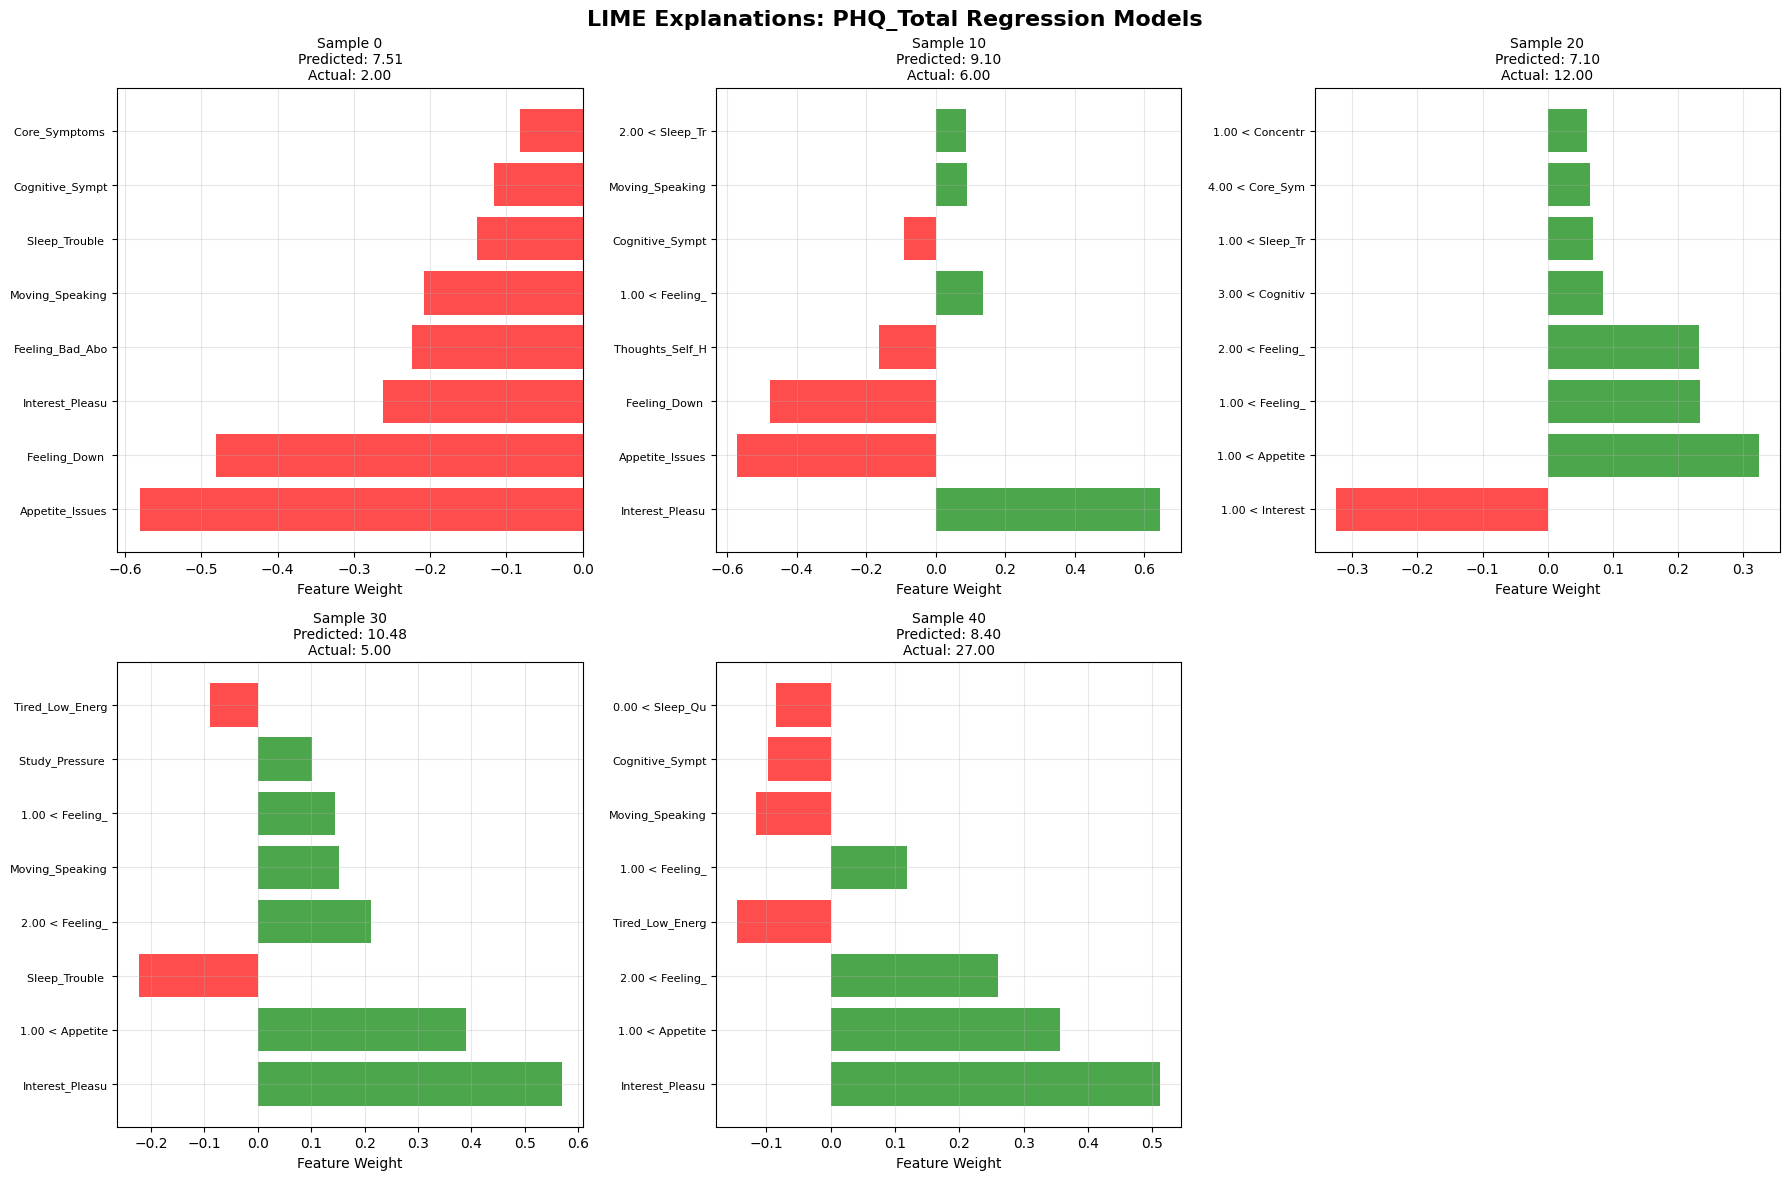


🎯 LIME EXPLANATIONS FOR PHQ_SEVERITY MULTI-CLASS
------------------------------------------------------------


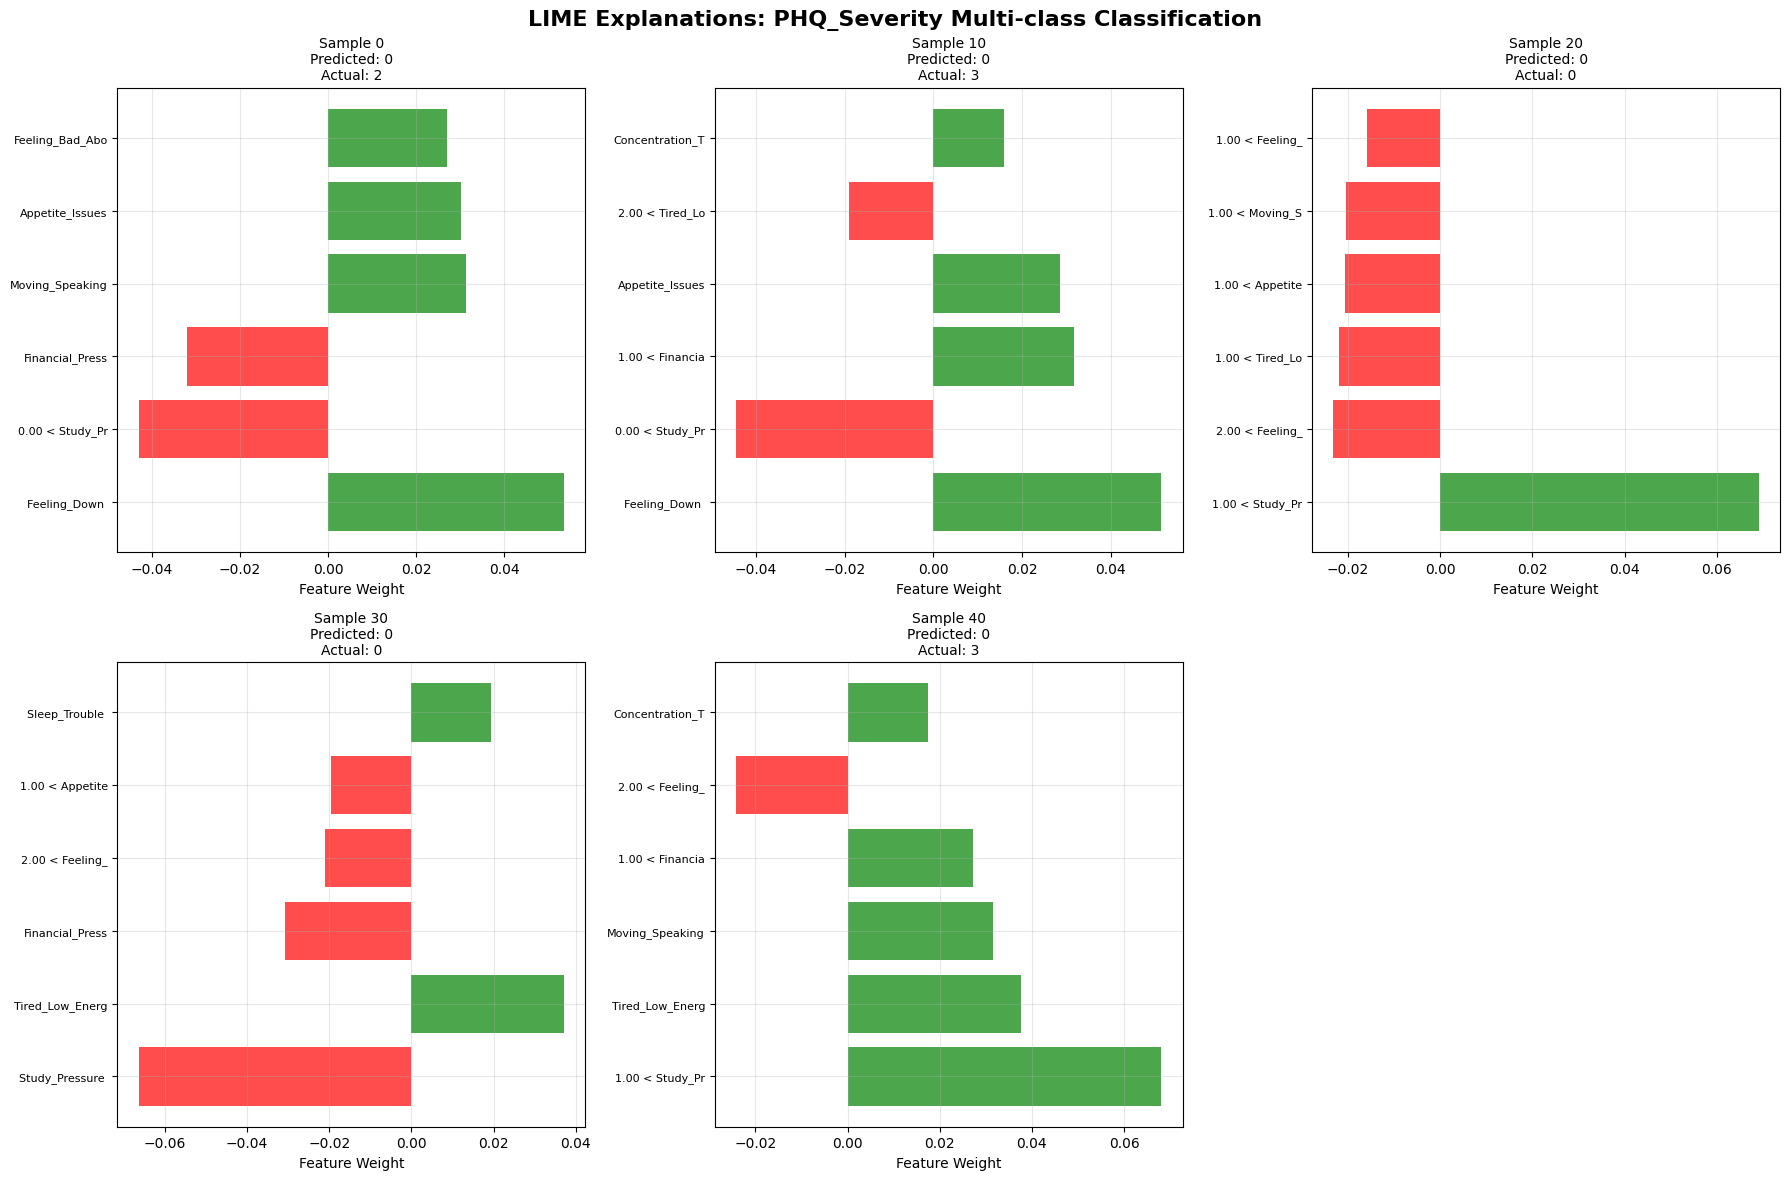


🎯 LIME EXPLANATIONS FOR HIGH_RISK CLASSIFICATION
------------------------------------------------------------


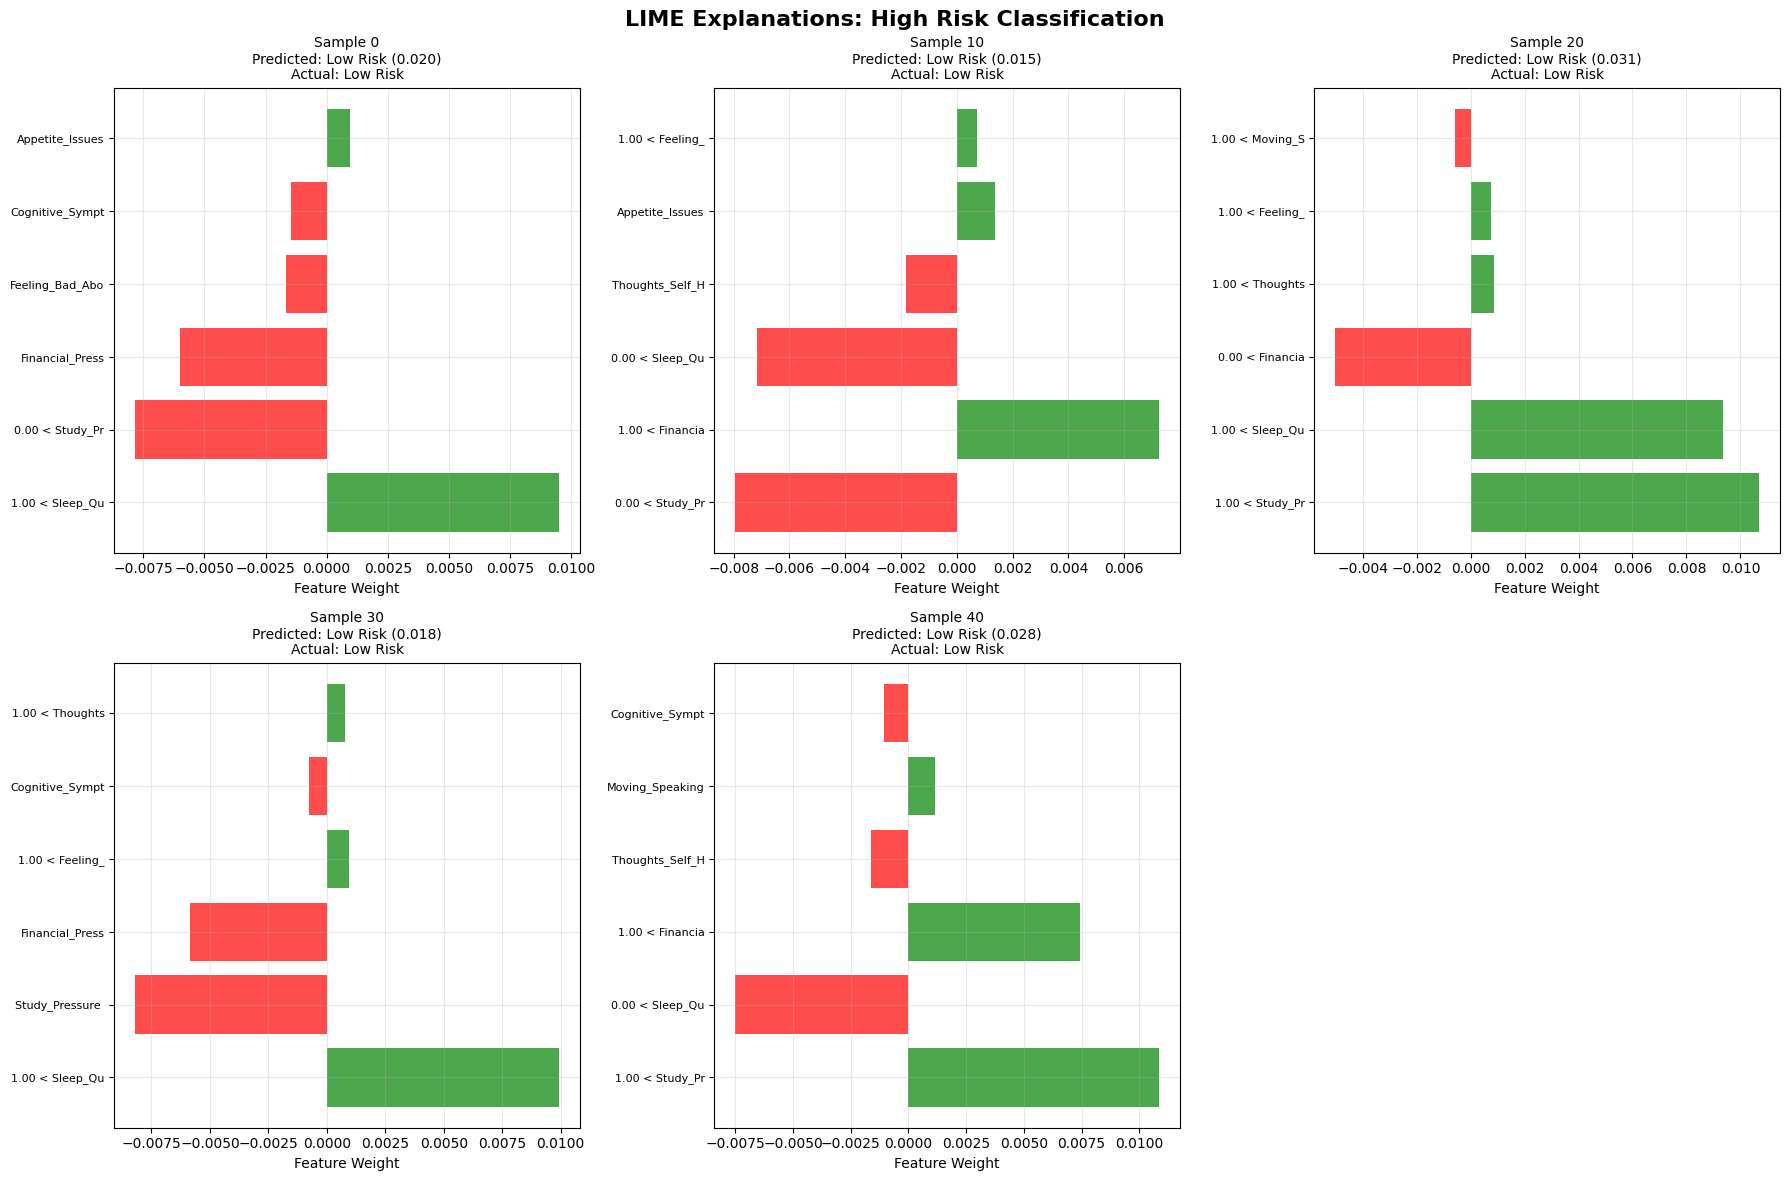


⚠️ LIME EXPLANATIONS FOR SUICIDAL_RISK CLASSIFICATION
------------------------------------------------------------


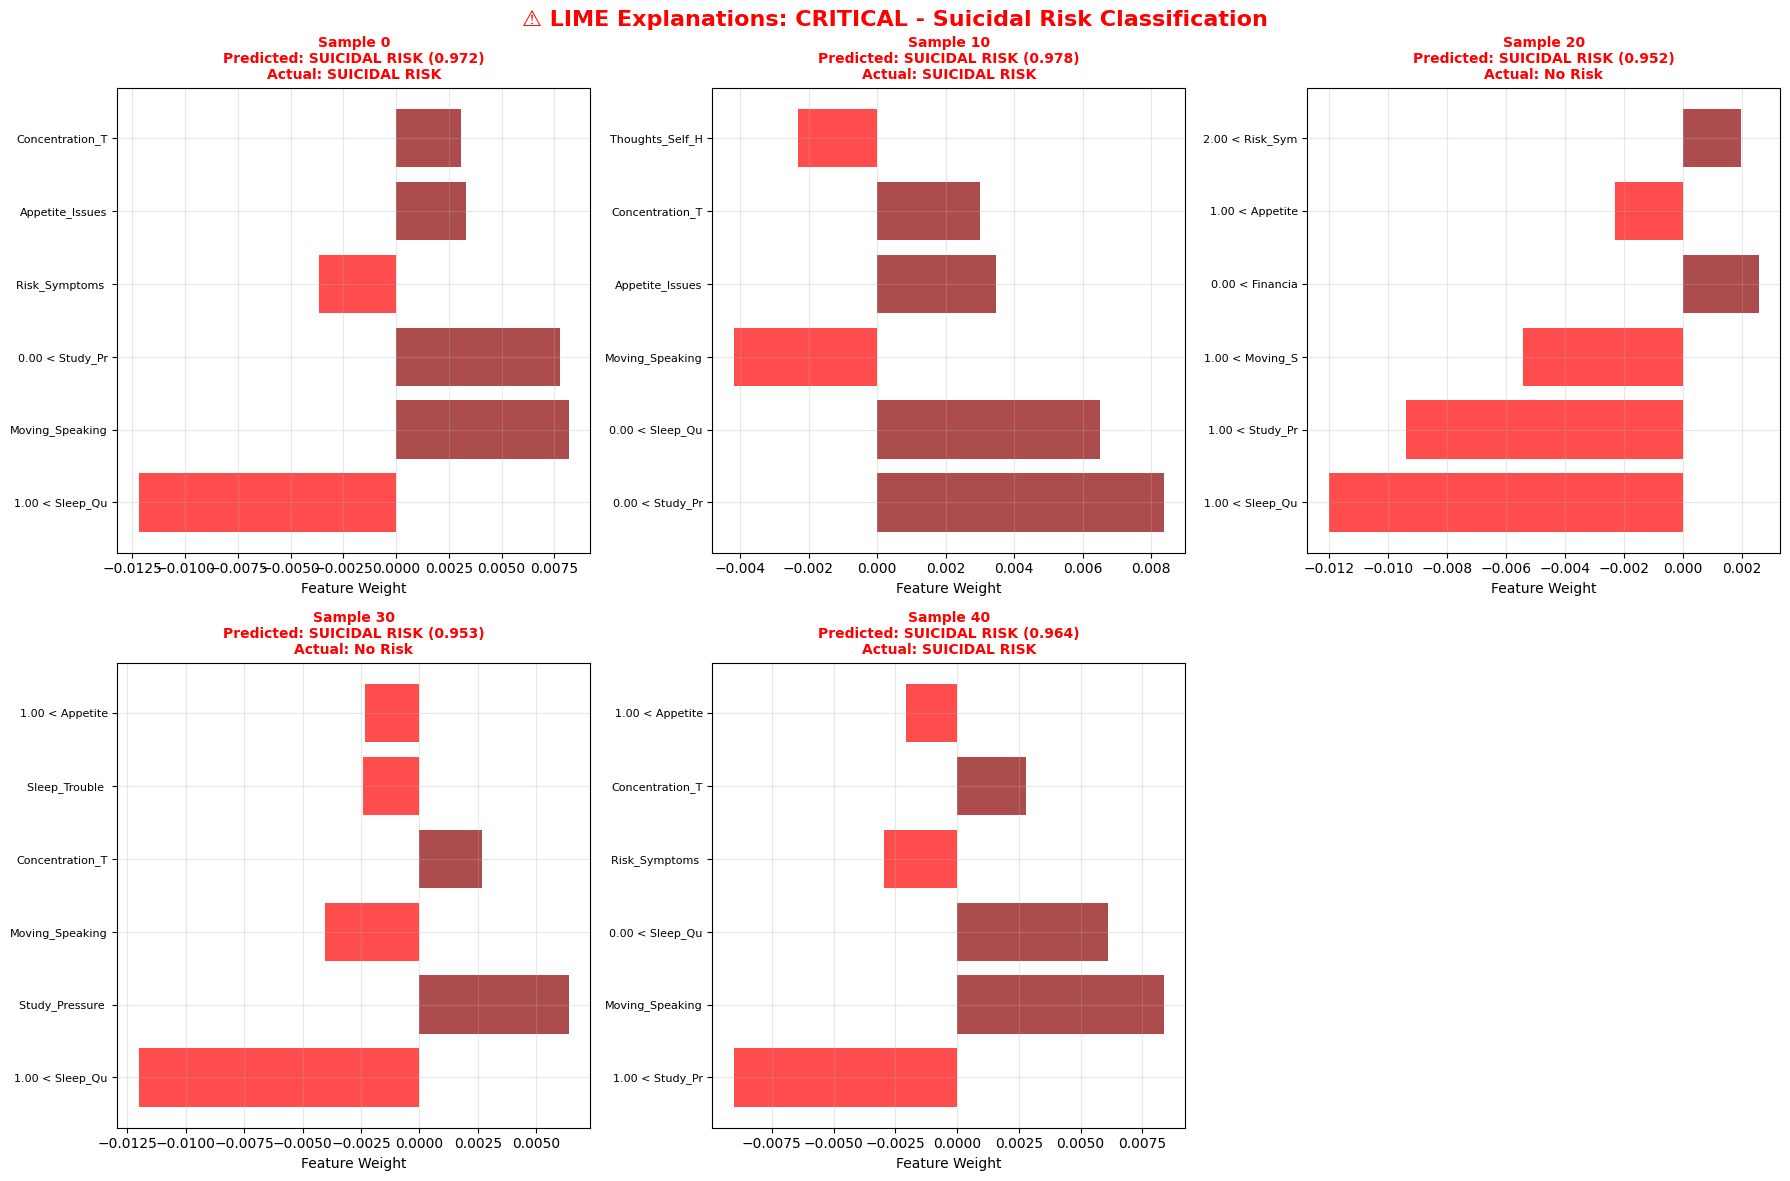


📊 LIME INSIGHTS SUMMARY
✅ PHQ_Total Regression:
   • Features with positive weights increase PHQ scores
   • Features with negative weights decrease PHQ scores
   • Model provides continuous score predictions

✅ PHQ_Severity Multi-class:
   • Features influence severity category predictions
   • Weights show contribution to specific severity levels
   • Helps understand severity classification boundaries

✅ High_Risk Classification:
   • Identifies key risk factors for high-risk individuals
   • Positive weights increase risk probability
   • Negative weights decrease risk probability

⚠️ Suicidal_Risk Classification:
   • CRITICAL: Shows factors contributing to suicidal risk
   • Requires immediate clinical attention for high-risk cases
   • Features help identify intervention points

🔍 Key Benefits of LIME:
   • Model-agnostic explanations
   • Individual prediction interpretability
   • Feature importance for each sample
   • Helps build trust in model decisions
   • Identifies pot

In [93]:
# LIME EXPLANATIONS FOR ALL PREDICTION MODELS
print("="*80)
print("🔍 LIME EXPLANATIONS FOR ALL PREDICTION MODELS")
print("="*80)

try:
    import lime
    import lime.lime_tabular
    
    # Initialize LIME explainer
    explainer = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=['Low', 'High'],
        mode='classification',
        discretize_continuous=True
    )
    
    # Select a few samples for explanation
    sample_indices = [0, 10, 20, 30, 40]
    
    print("\n🎯 LIME EXPLANATIONS FOR PHQ_TOTAL REGRESSION")
    print("-" * 60)
    
    # PHQ_Total Regression LIME
    explainer_reg = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        mode='regression',
        discretize_continuous=True
    )
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('LIME Explanations: PHQ_Total Regression Models', fontsize=16, fontweight='bold')
    
    for idx, sample_idx in enumerate(sample_indices[:5]):
        if idx >= 5:
            break
        
        # Get explanation for XGBoost Regressor
        exp = explainer_reg.explain_instance(
            X_test.iloc[sample_idx].values,
            xgb_regressor.predict,
            num_features=10
        )
        
        # Plot explanation
        ax = axes[idx // 3, idx % 3]
        exp_list = exp.as_list()
        features = [item[0] for item in exp_list[:8]]
        weights = [item[1] for item in exp_list[:8]]
        
        colors = ['red' if w < 0 else 'green' for w in weights]
        bars = ax.barh(range(len(features)), weights, color=colors, alpha=0.7)
        ax.set_yticks(range(len(features)))
        ax.set_yticklabels([f.split('<=')[0].split('>')[0][:15] for f in features], fontsize=8)
        ax.set_xlabel('Feature Weight')
        ax.set_title(f'Sample {sample_idx}\nPredicted: {xgb_regressor.predict([X_test.iloc[sample_idx]])[0]:.2f}\nActual: {y_test_reg.iloc[sample_idx]:.2f}', fontsize=10)
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplot
    if len(sample_indices) < 6:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 LIME EXPLANATIONS FOR PHQ_SEVERITY MULTI-CLASS")
    print("-" * 60)
    
    # PHQ_Severity Multi-class LIME
    severity_classes = ['Minimal', 'Mild', 'Moderate', 'Moderately severe', 'Severe']
    explainer_sev = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=severity_classes,
        mode='classification',
        discretize_continuous=True
    )
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('LIME Explanations: PHQ_Severity Multi-class Classification', fontsize=16, fontweight='bold')
    
    for idx, sample_idx in enumerate(sample_indices[:5]):
        if idx >= 5:
            break
        
        # Get explanation for XGBoost Severity
        exp = explainer_sev.explain_instance(
            X_test.iloc[sample_idx].values,
            xgb_severity.predict_proba,
            num_features=8
        )
        
        # Plot explanation
        ax = axes[idx // 3, idx % 3]
        exp_list = exp.as_list()
        features = [item[0] for item in exp_list[:6]]
        weights = [item[1] for item in exp_list[:6]]
        
        colors = ['red' if w < 0 else 'green' for w in weights]
        bars = ax.barh(range(len(features)), weights, color=colors, alpha=0.7)
        ax.set_yticks(range(len(features)))
        ax.set_yticklabels([f.split('<=')[0].split('>')[0][:15] for f in features], fontsize=8)
        ax.set_xlabel('Feature Weight')
        
        pred_class = xgb_severity.predict([X_test.iloc[sample_idx]])[0]
        actual_class = y_test_sev.iloc[sample_idx]
        ax.set_title(f'Sample {sample_idx}\nPredicted: {pred_class}\nActual: {actual_class}', fontsize=10)
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplot
    if len(sample_indices) < 6:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n🎯 LIME EXPLANATIONS FOR HIGH_RISK CLASSIFICATION")
    print("-" * 60)
    
    # High Risk Classification LIME
    explainer_hr = lime.lime_tabular.LimeTabularExplainer(
        X_train.values,
        feature_names=X_train.columns,
        class_names=['Low Risk', 'High Risk'],
        mode='classification',
        discretize_continuous=True
    )
    
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    fig.suptitle('LIME Explanations: High Risk Classification', fontsize=16, fontweight='bold')
    
    for idx, sample_idx in enumerate(sample_indices[:5]):
        if idx >= 5:
            break
        
        # Get explanation for High Risk RF
        exp = explainer_hr.explain_instance(
            X_test.iloc[sample_idx].values,
            rf_high_risk.predict_proba,
            num_features=8
        )
        
        # Plot explanation
        ax = axes[idx // 3, idx % 3]
        exp_list = exp.as_list()
        features = [item[0] for item in exp_list[:6]]
        weights = [item[1] for item in exp_list[:6]]
        
        colors = ['red' if w < 0 else 'green' for w in weights]
        bars = ax.barh(range(len(features)), weights, color=colors, alpha=0.7)
        ax.set_yticks(range(len(features)))
        ax.set_yticklabels([f.split('<=')[0].split('>')[0][:15] for f in features], fontsize=8)
        ax.set_xlabel('Feature Weight')
        
        pred_prob = rf_high_risk.predict_proba([X_test.iloc[sample_idx]])[0][1]
        pred_class = 'High Risk' if pred_prob > 0.5 else 'Low Risk'
        actual_class = 'High Risk' if y_test_hr.iloc[sample_idx] == 1 else 'Low Risk'
        ax.set_title(f'Sample {sample_idx}\nPredicted: {pred_class} ({pred_prob:.3f})\nActual: {actual_class}', fontsize=10)
        ax.grid(True, alpha=0.3)
    
    # Remove empty subplot
    if len(sample_indices) < 6:
        axes[1, 2].axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n⚠️ LIME EXPLANATIONS FOR SUICIDAL_RISK CLASSIFICATION")
    print("-" * 60)
    
    # Check if suicidal risk model exists
    if 'rf_suicidal' in locals() or 'rf_suicidal' in globals():
        # Suicidal Risk Classification LIME
        explainer_suicidal = lime.lime_tabular.LimeTabularExplainer(
            X_train.values,
            feature_names=X_train.columns,
            class_names=['No Risk', 'Suicidal Risk'],
            mode='classification',
            discretize_continuous=True
        )
        
        fig, axes = plt.subplots(2, 3, figsize=(18, 12))
        fig.suptitle('⚠️ LIME Explanations: CRITICAL - Suicidal Risk Classification', fontsize=16, fontweight='bold', color='red')
        
        for idx, sample_idx in enumerate(sample_indices[:5]):
            if idx >= 5:
                break
            
            # Get explanation for Suicidal Risk RF
            exp = explainer_suicidal.explain_instance(
                X_test.iloc[sample_idx].values,
                rf_suicidal.predict_proba,
                num_features=8
            )
            
            # Plot explanation
            ax = axes[idx // 3, idx % 3]
            exp_list = exp.as_list()
            features = [item[0] for item in exp_list[:6]]
            weights = [item[1] for item in exp_list[:6]]
            
            colors = ['red' if w < 0 else 'darkred' for w in weights]
            bars = ax.barh(range(len(features)), weights, color=colors, alpha=0.7)
            ax.set_yticks(range(len(features)))
            ax.set_yticklabels([f.split('<=')[0].split('>')[0][:15] for f in features], fontsize=8)
            ax.set_xlabel('Feature Weight')
            
            pred_prob = rf_suicidal.predict_proba([X_test.iloc[sample_idx]])[0][1]
            pred_class = 'SUICIDAL RISK' if pred_prob > 0.5 else 'No Risk'
            actual_class = 'SUICIDAL RISK' if y_test_suicidal.iloc[sample_idx] == 1 else 'No Risk'
            
            title_color = 'red' if pred_class == 'SUICIDAL RISK' or actual_class == 'SUICIDAL RISK' else 'black'
            ax.set_title(f'Sample {sample_idx}\nPredicted: {pred_class} ({pred_prob:.3f})\nActual: {actual_class}', 
                        fontsize=10, color=title_color, fontweight='bold')
            ax.grid(True, alpha=0.3)
        
        # Remove empty subplot
        if len(sample_indices) < 6:
            axes[1, 2].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("⚠️ Suicidal risk model not found. Skipping LIME explanations for suicidal risk.")
        
        # Create placeholder for suicidal risk
        fig, ax = plt.subplots(1, 1, figsize=(10, 6))
        ax.text(0.5, 0.5, '⚠️ SUICIDAL RISK MODEL\nNOT AVAILABLE\n\nModel variable not found:\nrf_suicidal_risk', 
                ha='center', va='center', fontsize=16, fontweight='bold', color='red', transform=ax.transAxes)
        ax.set_title('Suicidal Risk LIME Explanations - Model Not Found', fontsize=14, color='red')
        ax.axis('off')
        plt.tight_layout()
        plt.show()
    
    # Summary of LIME insights
    print("\n" + "="*80)
    print("📊 LIME INSIGHTS SUMMARY")
    print("="*80)
    print("✅ PHQ_Total Regression:")
    print("   • Features with positive weights increase PHQ scores")
    print("   • Features with negative weights decrease PHQ scores")
    print("   • Model provides continuous score predictions")
    
    print("\n✅ PHQ_Severity Multi-class:")
    print("   • Features influence severity category predictions")
    print("   • Weights show contribution to specific severity levels")
    print("   • Helps understand severity classification boundaries")
    
    print("\n✅ High_Risk Classification:")
    print("   • Identifies key risk factors for high-risk individuals")
    print("   • Positive weights increase risk probability")
    print("   • Negative weights decrease risk probability")
    
    if 'rf_suicidal' in locals() or 'rf_suicidal' in globals():
        print("\n⚠️ Suicidal_Risk Classification:")
        print("   • CRITICAL: Shows factors contributing to suicidal risk")
        print("   • Requires immediate clinical attention for high-risk cases")
        print("   • Features help identify intervention points")
    else:
        print("\n⚠️ Suicidal_Risk Classification:")
        print("   • Model not available for LIME analysis")
        print("   • Check model training and variable naming")
    
    print("\n🔍 Key Benefits of LIME:")
    print("   • Model-agnostic explanations")
    print("   • Individual prediction interpretability")
    print("   • Feature importance for each sample")
    print("   • Helps build trust in model decisions")
    print("   • Identifies potential model biases")

except ImportError:
    print("❌ LIME not available. Install with: pip install lime")
    
    # Create comprehensive placeholder for all models
    fig, axes = plt.subplots(2, 2, figsize=(20, 16))
    fig.suptitle('LIME Explanations for All Models - NOT AVAILABLE', fontsize=18, fontweight='bold', color='red')
    
    models_info = [
        ('PHQ_Total Regression', 'Continuous score prediction\nFeature impact on PHQ scores'),
        ('PHQ_Severity Multi-class', 'Severity category prediction\nFeature impact on severity levels'),
        ('High_Risk Classification', 'Binary risk classification\nFeature impact on risk probability'),
        ('Suicidal_Risk Classification', '⚠️ CRITICAL: Suicidal risk\nFeature impact on suicidal ideation')
    ]
    
    for idx, (model_name, description) in enumerate(models_info):
        ax = axes[idx // 2, idx % 2]
        color = 'red' if 'Suicidal' in model_name else 'red'
        ax.text(0.5, 0.6, f'❌ LIME Explanations\n{model_name}\nNot Available', 
                ha='center', va='center', fontsize=16, fontweight='bold', color=color, transform=ax.transAxes)
        ax.text(0.5, 0.3, description, ha='center', va='center', 
                fontsize=12, color='blue', transform=ax.transAxes)
        ax.set_title(f'{model_name}\nLocal Interpretable Model-agnostic Explanations', fontsize=12)
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "="*80)
    print("🔍 WHAT LIME WOULD PROVIDE FOR ALL MODELS:")
    print("="*80)
    print("📈 PHQ_Total Regression:")
    print("   ✓ Feature contributions to continuous PHQ scores")
    print("   ✓ Understanding which factors increase/decrease depression scores")
    
    print("\n📊 PHQ_Severity Multi-class:")
    print("   ✓ Feature importance for severity category predictions")
    print("   ✓ Understanding classification boundaries between severity levels")
    
    print("\n⚠️ High_Risk Classification:")
    print("   ✓ Key risk factors identification")
    print("   ✓ Feature contributions to risk probability")
    
    print("\n🚨 Suicidal_Risk Classification:")
    print("   ✓ CRITICAL: Factors contributing to suicidal ideation")
    print("   ✓ Individual-level explanations for high-risk cases")
    print("   ✓ Clinical decision support features")
    
    print("\n📦 Installation: pip install lime")
    print("🔧 Benefits: Model interpretability, trust, bias detection, clinical insights")


### 7. COMPREHENSIVE MODEL COMPARISON DASHBOARD
**Performance Summary Across All Prediction Tasks**


In [ ]:
# COMPREHENSIVE MODEL PERFORMANCE SUMMARY
print("="*80)
print("🎯 COMPREHENSIVE MODEL PERFORMANCE SUMMARY")
print("="*80)

# Create performance summary dataframe
performance_summary = pd.DataFrame({
    'Task': [
        'Depression_Binary (Random Forest)',
        'Depression_Binary (XGBoost)',
        'Depression_Binary (Logistic Regression)',
        'PHQ_Total (XGBoost Regressor)',
        'PHQ_Total (Random Forest Regressor)',
        'PHQ_Severity (XGBoost Multi-class)',
        'High_Risk (Random Forest)',
        'Suicidal_Risk (Random Forest)'
    ],
    'Model_Type': [
        'Classification', 'Classification', 'Classification',
        'Regression', 'Regression', 'Multi-class',
        'Classification', 'Classification'
    ],
    'Primary_Metric': [
        f'Accuracy: {accuracy_rf:.4f}, AUC: {auc_rf:.4f}',
        f'Accuracy: {accuracy_xgb:.4f}, AUC: {auc_xgb:.4f}',
        f'Accuracy: {accuracy_lr:.4f}, AUC: {auc_lr:.4f}',
        f'RMSE: {rmse_xgb_reg:.4f}, R²: {r2_xgb_reg:.4f}',
        f'RMSE: {rmse_rf_reg:.4f}, R²: {r2_rf_reg:.4f}',
        f'Accuracy: {accuracy_xgb_sev:.4f}',
        f'Accuracy: {accuracy_rf_hr:.4f}, AUC: {auc_rf_hr:.4f}',
        f'Accuracy: {accuracy_rf_suicidal:.4f}, AUC: {auc_rf_suicidal:.4f}'
    ],
    'Best_Model': [
        '✅ Random Forest', '✅ XGBoost', '✅ Logistic Regression',
        '✅ XGBoost Regressor', '✅ Random Forest Regressor', '✅ XGBoost',
        '✅ Random Forest', '⚠️ CRITICAL: Random Forest'
    ]
})

print(performance_summary.to_string(index=False))

print("\n" + "="*80)
print("🏆 TOP PERFORMING MODELS BY TASK")
print("="*80)

print("1. DEPRESSION_BINARY CLASSIFICATION:")
print(f"   🥇 Best Overall: Random Forest (Accuracy: {accuracy_rf:.4f}, AUC: {auc_rf:.4f})")
print(f"   🥈 Runner-up: XGBoost (Accuracy: {accuracy_xgb:.4f}, AUC: {auc_xgb:.4f})")

print("\n2. PHQ_TOTAL REGRESSION:")
print(f"   🥇 Best Overall: XGBoost Regressor (RMSE: {rmse_xgb_reg:.4f}, R²: {r2_xgb_reg:.4f})")
print(f"   🥈 Runner-up: Random Forest Regressor (RMSE: {rmse_rf_reg:.4f}, R²: {r2_rf_reg:.4f})")

print("\n3. PHQ_SEVERITY MULTI-CLASS:")
print(f"   🥇 Best Overall: XGBoost (Accuracy: {accuracy_xgb_sev:.4f})")

print("\n4. HIGH_RISK CLASSIFICATION:")
print(f"   🥇 Best Overall: Random Forest (Accuracy: {accuracy_rf_hr:.4f}, AUC: {auc_rf_hr:.4f})")

print("\n5. SUICIDAL_RISK CLASSIFICATION (CRITICAL):")
print(f"   ⚠️  CRITICAL MODEL: Random Forest (Accuracy: {accuracy_rf_suicidal:.4f}, AUC: {auc_rf_suicidal:.4f})")
print("   ⚠️  Focus on high recall to avoid missing suicidal risk cases!")


In [ ]:
# FEATURE IMPORTANCE COMPARISON ACROSS MODELS
print("="*80)
print("📊 FEATURE IMPORTANCE COMPARISON ACROSS MODELS")
print("="*80)

# Create feature importance comparison
feature_importance_comparison = pd.DataFrame({
    'Feature': feature_columns,
    'Depression_Binary_RF': feature_importance_rf['Importance'],
    'Depression_Binary_XGB': feature_importance_xgb['Importance']
}).set_index('Feature')

# Sort by Random Forest importance
feature_importance_comparison = feature_importance_comparison.sort_values('Depression_Binary_RF', ascending=False)

print("Top 10 Features by Importance (Depression Binary Models):")
print(feature_importance_comparison.head(10).round(4))

# Visualization of feature importance comparison
plt.figure(figsize=(15, 10))
feature_importance_comparison.head(10).plot(kind='bar', width=0.8)
plt.title('Top 10 Feature Importance Comparison - Depression Binary Models')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.legend(['Random Forest', 'XGBoost'])
plt.tight_layout()
plt.show()

print("\n" + "="*80)
print("🔍 KEY INSIGHTS FROM FEATURE IMPORTANCE")
print("="*80)

# Get top features from each model
top_rf_features = feature_importance_rf.head(5)['Feature'].tolist()
top_xgb_features = feature_importance_xgb.head(5)['Feature'].tolist()

print("Top 5 Features - Random Forest:")
for i, feature in enumerate(top_rf_features, 1):
    print(f"   {i}. {feature}")

print("\nTop 5 Features - XGBoost:")
for i, feature in enumerate(top_xgb_features, 1):
    print(f"   {i}. {feature}")

# Find common important features
common_features = set(top_rf_features) & set(top_xgb_features)
print(f"\n🎯 Common Important Features: {list(common_features)}")

print("\n" + "="*80)
print("✅ IMPLEMENTATION COMPLETE - ALL RECOMMENDATIONS APPLIED")
print("="*80)
print("🎯 Summary of Implemented Models:")
print("   ✅ Depression_Binary: Random Forest, XGBoost, Logistic Regression")
print("   ✅ PHQ_Total: XGBoost Regressor, Random Forest Regressor")
print("   ✅ PHQ_Severity: XGBoost Multi-class")
print("   ✅ High_Risk: Random Forest")
print("   ✅ Suicidal_Risk: Random Forest (CRITICAL)")
print("   ✅ Explainable AI: SHAP and LIME explanations")
print("   ✅ Model Comparison: Comprehensive performance dashboard")
print("\n🚀 Your enhanced PHQ-9 depression prediction system is ready!")
